In [1]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 101.0 MB/s eta 0:00:0000:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 43.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install mlflow --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 49.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 80.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.0/552.0 kB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [1]:
import mlflow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support,r2_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from collections import defaultdict

## Importing the Dataset

In [8]:
df=pd.read_csv('sampled_final_df.csv')
df_train=df.drop("isFraud",axis=1)
output_col=pd.DataFrame(df['isFraud'])

## Cleaning the dataset

In [9]:
df_train['CASH_IN']=df_train['CASH_IN'].map({True:1,False:0})
df_train['CASH_OUT']=df_train['CASH_OUT'].map({True:1,False:0})
df_train['DEBIT']=df_train['DEBIT'].map({True:1,False:0})
df_train['PAYMENT']=df_train['PAYMENT'].map({True:1,False:0})
df_train['TRANSFER']=df_train['TRANSFER'].map({True:1,False:0})


In [10]:
df_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,563,18417.240320,18417.240320,0.00,1.240395e+04,1.551259e+04,0,0,1,0,0,1,209519,2572822
1,419,346354.615847,346354.615847,0.00,0.000000e+00,3.463546e+05,0,0,1,0,0,0,403995,6311127
2,229,291590.310000,6049.000000,0.00,2.497772e+04,3.165680e+05,0,0,1,0,0,0,482160,3861560
3,418,66777.824054,66777.824054,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,1,351115,1371643
4,379,678.130000,45082.000000,44403.87,0.000000e+00,0.000000e+00,0,0,0,0,1,0,2184529,5689466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50824,244,717917.637444,717917.637444,0.00,1.174964e+07,1.246756e+07,0,0,1,0,0,0,370174,4423416
50825,378,302.460000,792.000000,489.54,0.000000e+00,0.000000e+00,0,0,0,0,1,0,2151612,1769882
50826,190,11327.270000,10303.000000,0.00,0.000000e+00,0.000000e+00,0,0,0,0,1,0,1204550,6093817
50827,512,264334.474702,264334.474702,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,1,422565,1356128


In [11]:
df_train.dtypes

step                  int64
amount              float64
oldbalanceOrg       float64
newbalanceOrig      float64
oldbalanceDest      float64
newbalanceDest      float64
isFlaggedFraud        int64
CASH_IN               int64
CASH_OUT              int64
DEBIT                 int64
PAYMENT               int64
TRANSFER              int64
nameDest_encoded      int64
nameOrig_encoded      int64
dtype: object

In [12]:
df_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,563,18417.240320,18417.240320,0.00,1.240395e+04,1.551259e+04,0,0,1,0,0,1,209519,2572822
1,419,346354.615847,346354.615847,0.00,0.000000e+00,3.463546e+05,0,0,1,0,0,0,403995,6311127
2,229,291590.310000,6049.000000,0.00,2.497772e+04,3.165680e+05,0,0,1,0,0,0,482160,3861560
3,418,66777.824054,66777.824054,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,1,351115,1371643
4,379,678.130000,45082.000000,44403.87,0.000000e+00,0.000000e+00,0,0,0,0,1,0,2184529,5689466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50824,244,717917.637444,717917.637444,0.00,1.174964e+07,1.246756e+07,0,0,1,0,0,0,370174,4423416
50825,378,302.460000,792.000000,489.54,0.000000e+00,0.000000e+00,0,0,0,0,1,0,2151612,1769882
50826,190,11327.270000,10303.000000,0.00,0.000000e+00,0.000000e+00,0,0,0,0,1,0,1204550,6093817
50827,512,264334.474702,264334.474702,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,1,422565,1356128


In [13]:
df_train.dtypes

step                  int64
amount              float64
oldbalanceOrg       float64
newbalanceOrig      float64
oldbalanceDest      float64
newbalanceDest      float64
isFlaggedFraud        int64
CASH_IN               int64
CASH_OUT              int64
DEBIT                 int64
PAYMENT               int64
TRANSFER              int64
nameDest_encoded      int64
nameOrig_encoded      int64
dtype: object

In [14]:
df_train.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
count,50829.000000,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,5.082900e+04,5.082900e+04
mean,305.693384,2.129561e+05,5.368273e+05,4.270252e+05,1.019196e+06,1.191137e+06,0.000393,0.110213,0.552952,0.003443,0.167208,0.227882,5.139591e+05,3.150544e+06
std,173.018394,4.760683e+05,2.069521e+06,2.104247e+06,3.522850e+06,3.708267e+06,0.019833,0.313158,0.497193,0.058576,0.373165,0.419470,5.885310e+05,1.838557e+06
min,1.000000,9.700000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+00,2.600000e+01
25%,181.000000,2.783538e+04,1.048624e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.769170e+05,1.555214e+06
50%,298.000000,1.057949e+05,6.282000e+04,0.000000e+00,3.767953e+04,2.428489e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.398270e+05,3.136695e+06
75%,404.000000,2.524101e+05,2.423399e+05,0.000000e+00,7.413421e+05,9.817932e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.056420e+05,4.752738e+06
max,742.000000,5.072328e+07,3.187613e+07,3.205108e+07,2.355353e+08,2.358797e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.721968e+06,6.352414e+06


In [15]:
categorical_columns=df_train.select_dtypes(exclude=np.number).columns
numerical_columns=df_train.select_dtypes(include=np.number).columns


## Exploratory Data Analysis


### 1. First step is to see the type of columns so that we could conclude that even now some columns needs to be appropriated.


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50829 entries, 0 to 50828
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   step              50829 non-null  int64  
 1   amount            50829 non-null  float64
 2   oldbalanceOrg     50829 non-null  float64
 3   newbalanceOrig    50829 non-null  float64
 4   oldbalanceDest    50829 non-null  float64
 5   newbalanceDest    50829 non-null  float64
 6   isFlaggedFraud    50829 non-null  int64  
 7   CASH_IN           50829 non-null  int64  
 8   CASH_OUT          50829 non-null  int64  
 9   DEBIT             50829 non-null  int64  
 10  PAYMENT           50829 non-null  int64  
 11  TRANSFER          50829 non-null  int64  
 12  nameDest_encoded  50829 non-null  int64  
 13  nameOrig_encoded  50829 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 5.4 MB


### 2. NULL Values . First step is to see the Null Values


In [17]:
df_train.isnull().sum()

step                0
amount              0
oldbalanceOrg       0
newbalanceOrig      0
oldbalanceDest      0
newbalanceDest      0
isFlaggedFraud      0
CASH_IN             0
CASH_OUT            0
DEBIT               0
PAYMENT             0
TRANSFER            0
nameDest_encoded    0
nameOrig_encoded    0
dtype: int64

<Axes: >

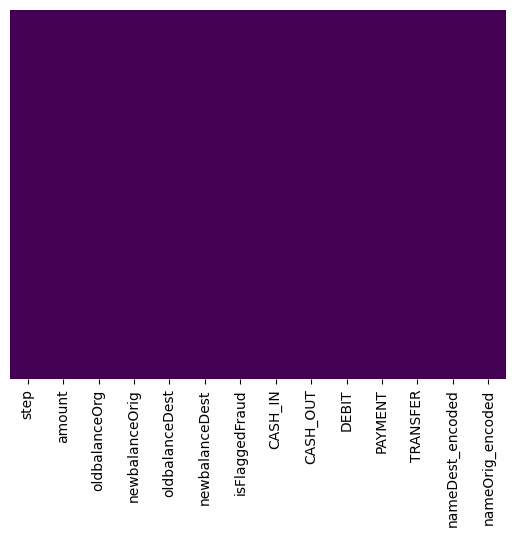

In [18]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### 3. Next step is to see the collinearity. We will use the spearman correlation since even if the dataset is spreaded we can see the correlation very easily. We will also use the Variable Inflation Factor to see the that whether a independent column could be predicted using other independednt columns

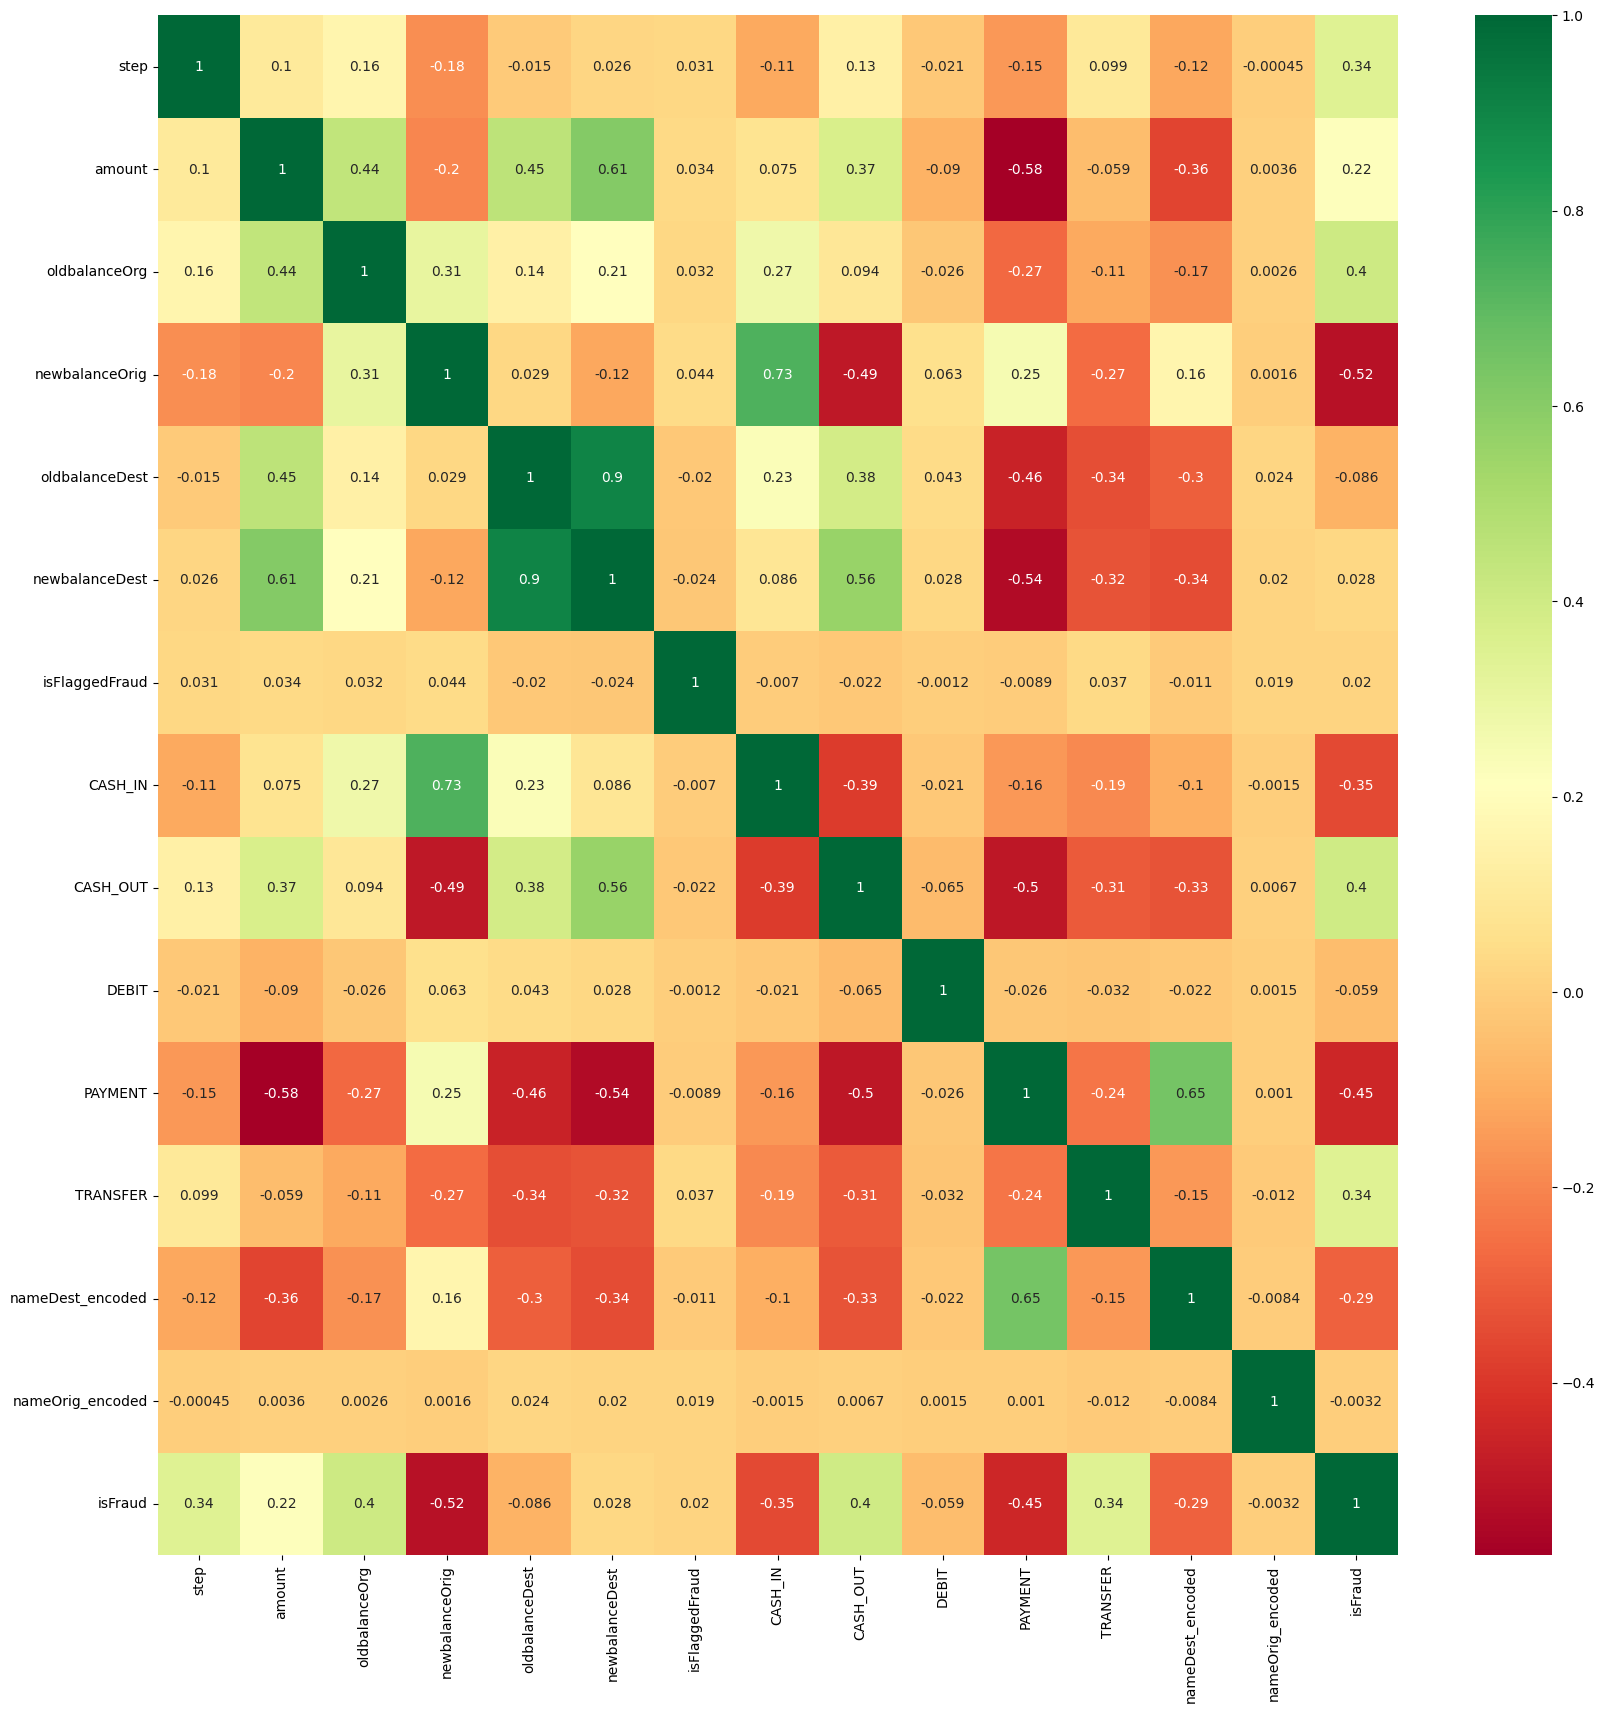

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.concat([df_train,output_col],axis=1).select_dtypes(include=np.number).corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

In [20]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



X = df_train.select_dtypes(include=np.number)
calc_vif(X)

,Variables,VIF
0,step,3.983052
1,amount,4.781047
2,oldbalanceOrg,93.099080
3,newbalanceOrig,95.589279
4,oldbalanceDest,115.344272
5,newbalanceDest,128.855338
6,isFlaggedFraud,1.076938
7,CASH_IN,2.283259
8,CASH_OUT,3.867847
9,DEBIT,1.016719


### 4. Next step is to see the outliers.


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

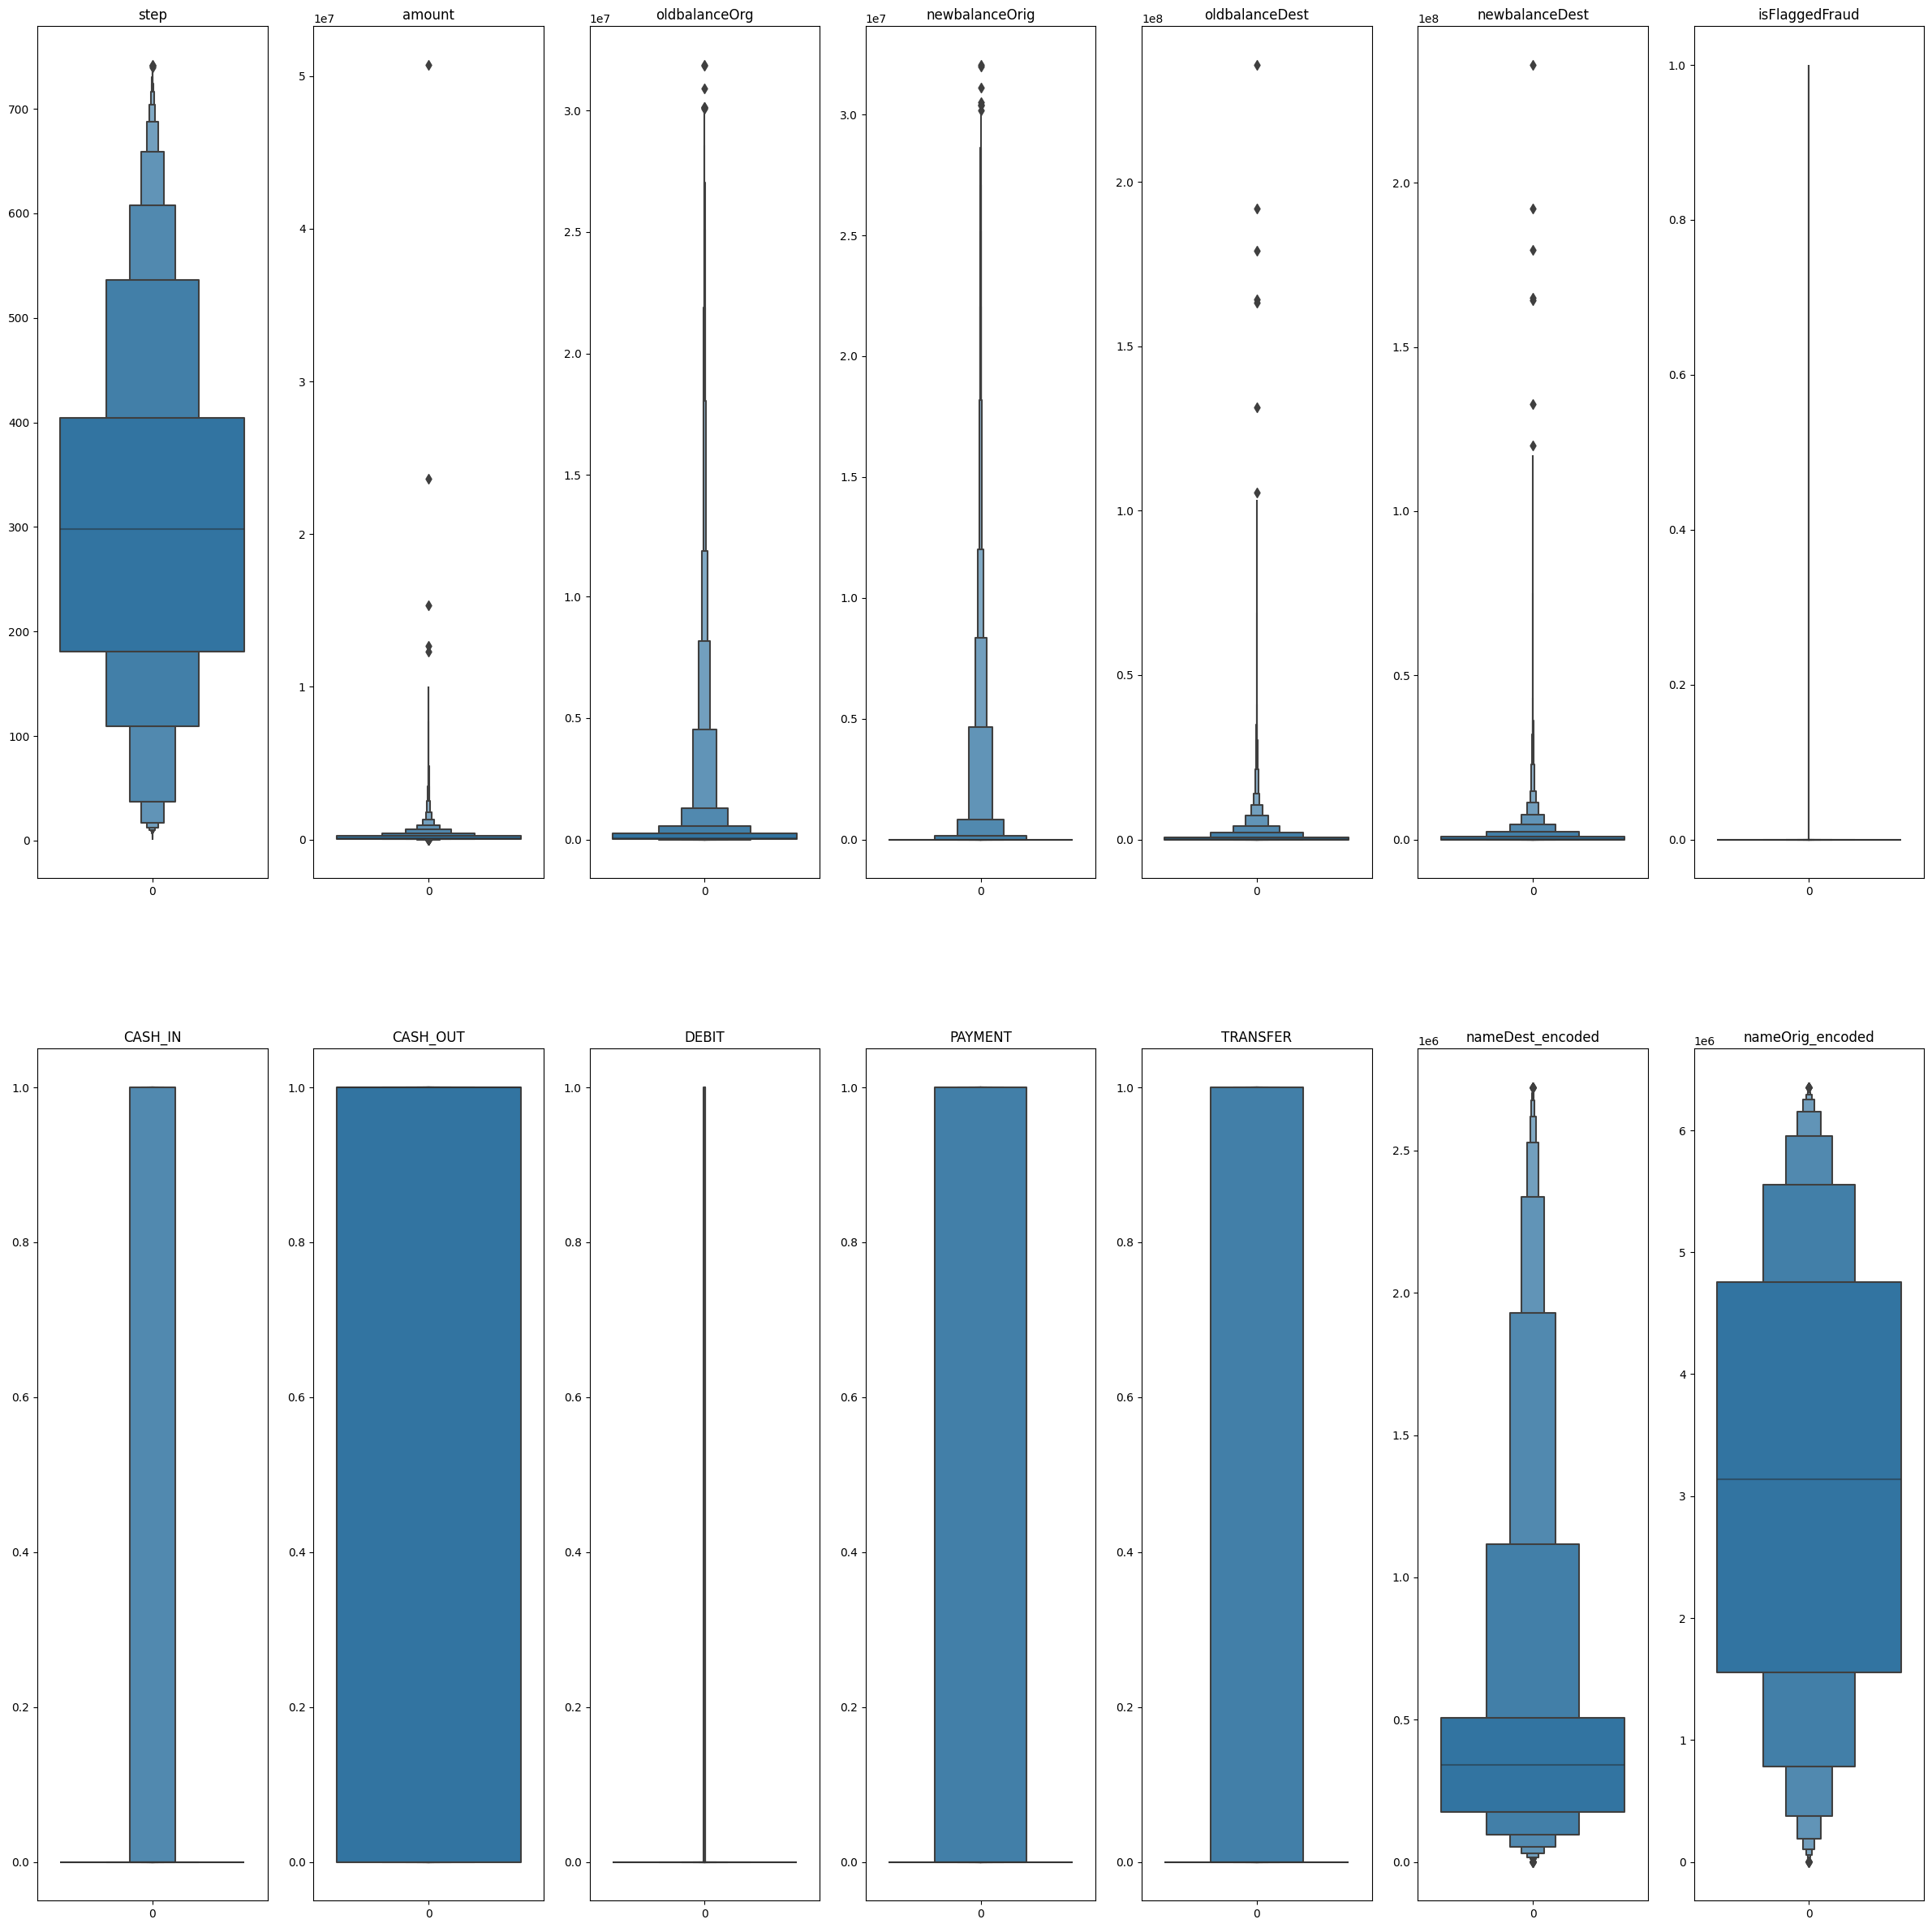

In [21]:
fig, axes = plt.subplots(nrows = 2, ncols = 7)   
axes = axes.flatten()        
fig.set_size_inches(30,30)

for ax, col in zip(axes, numerical_columns):
    print()
    sns.boxenplot(df_train[col], ax = ax)
    ax.set_title(col)

### 5. Next step is to see the density


In [22]:
range(len(df_train))


range(0, 50829)

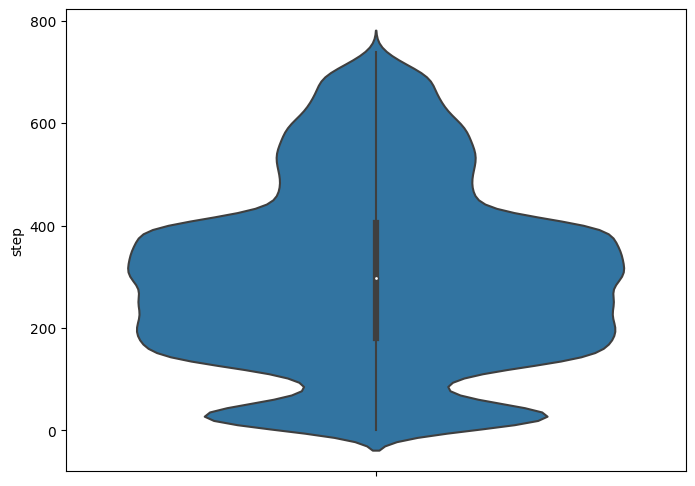

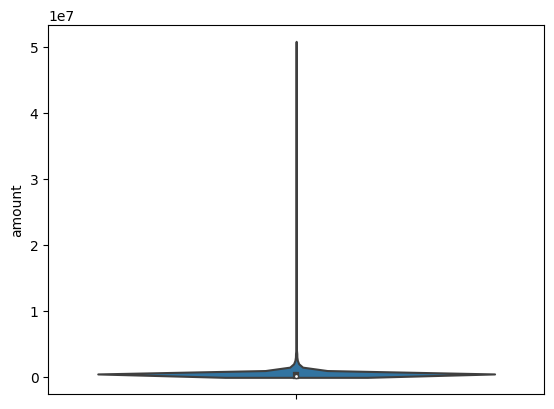

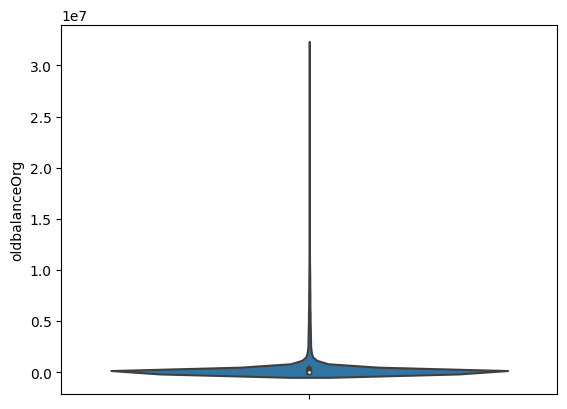

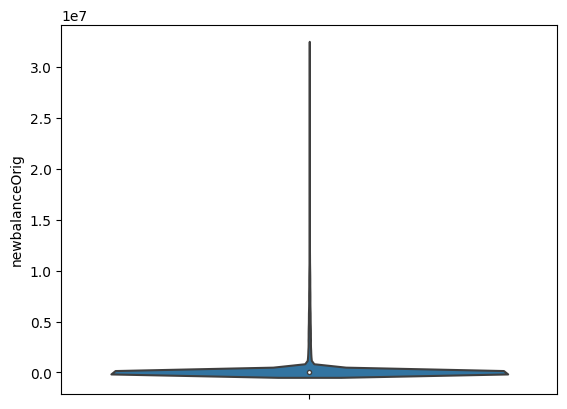

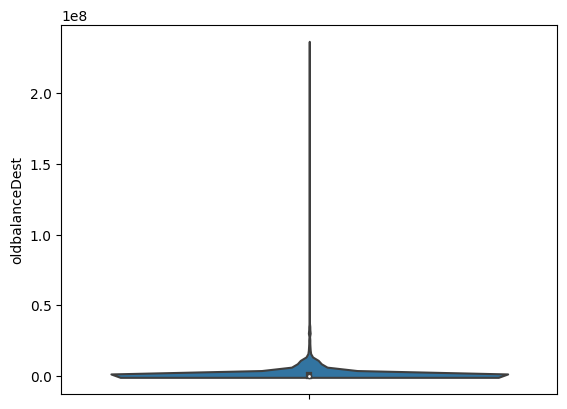

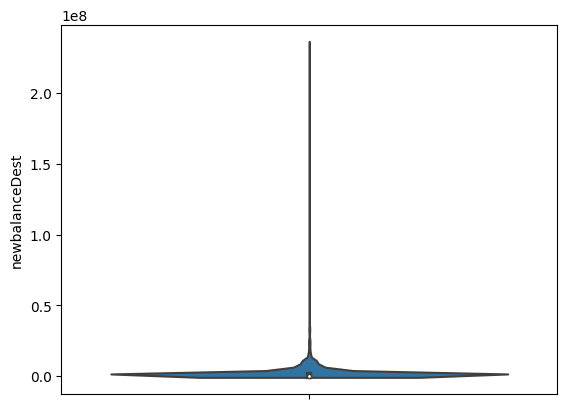

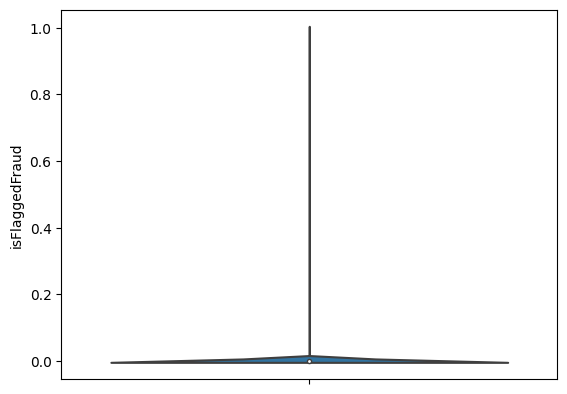

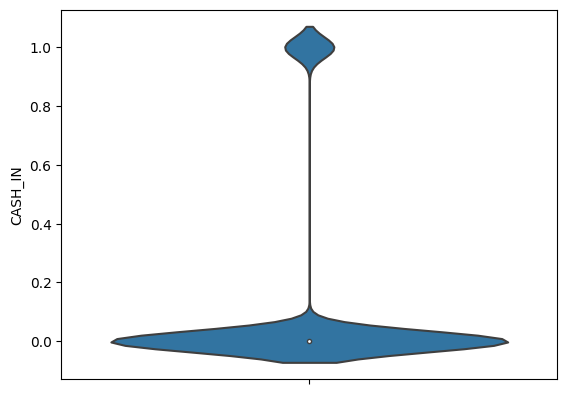

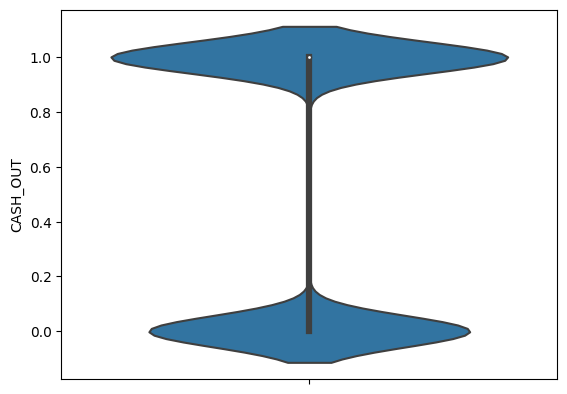

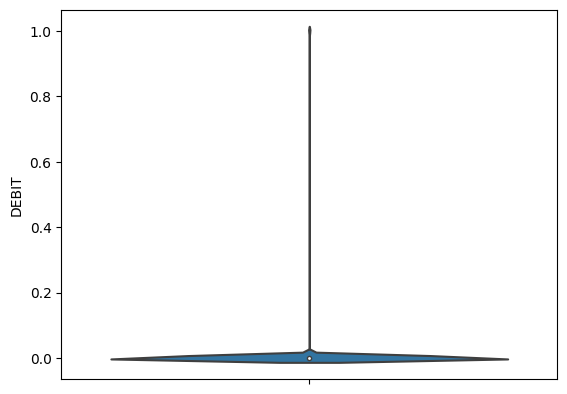

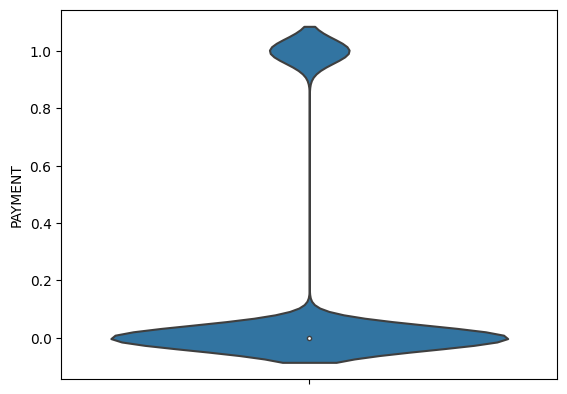

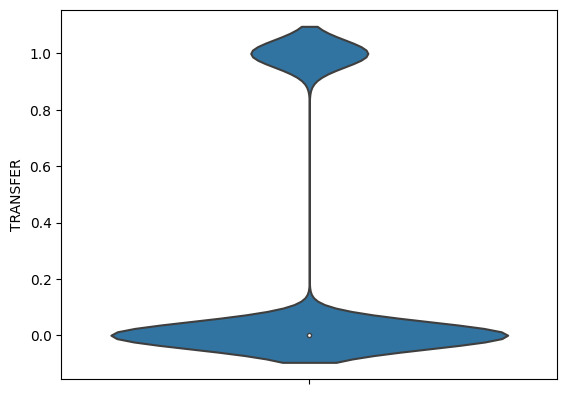

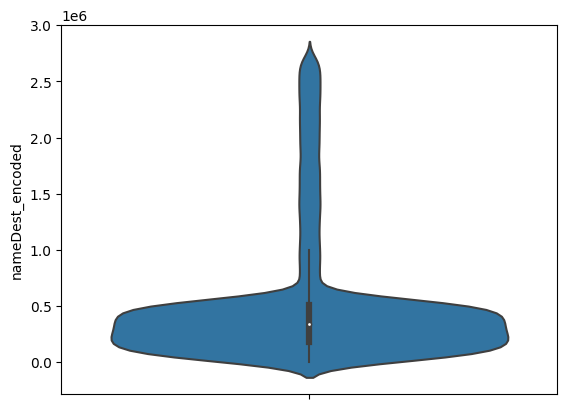

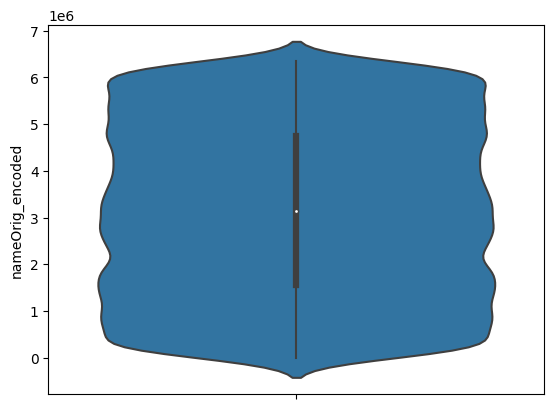

In [23]:
l=[]
for i in range(len(df_train)):
    l.append(i)
# Plot a violin plot for numerical vs categorical
plt.figure(figsize=(8, 6))
for col in numerical_columns:
    sns.violinplot(y=df_train[col])
    plt.show()

### 6. Next step is to see the distribution plot


/tmp/ipykernel_386/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_386/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).


/tmp/ipykernel_386/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_386/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).


/tmp/ipykernel_386/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_386/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).


/tmp/ipykernel_386/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_386/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).


/tmp/ipykernel_386/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_386/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).


/tmp/ipykernel_386/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_386/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).


/tmp/ipykernel_386/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_386/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).


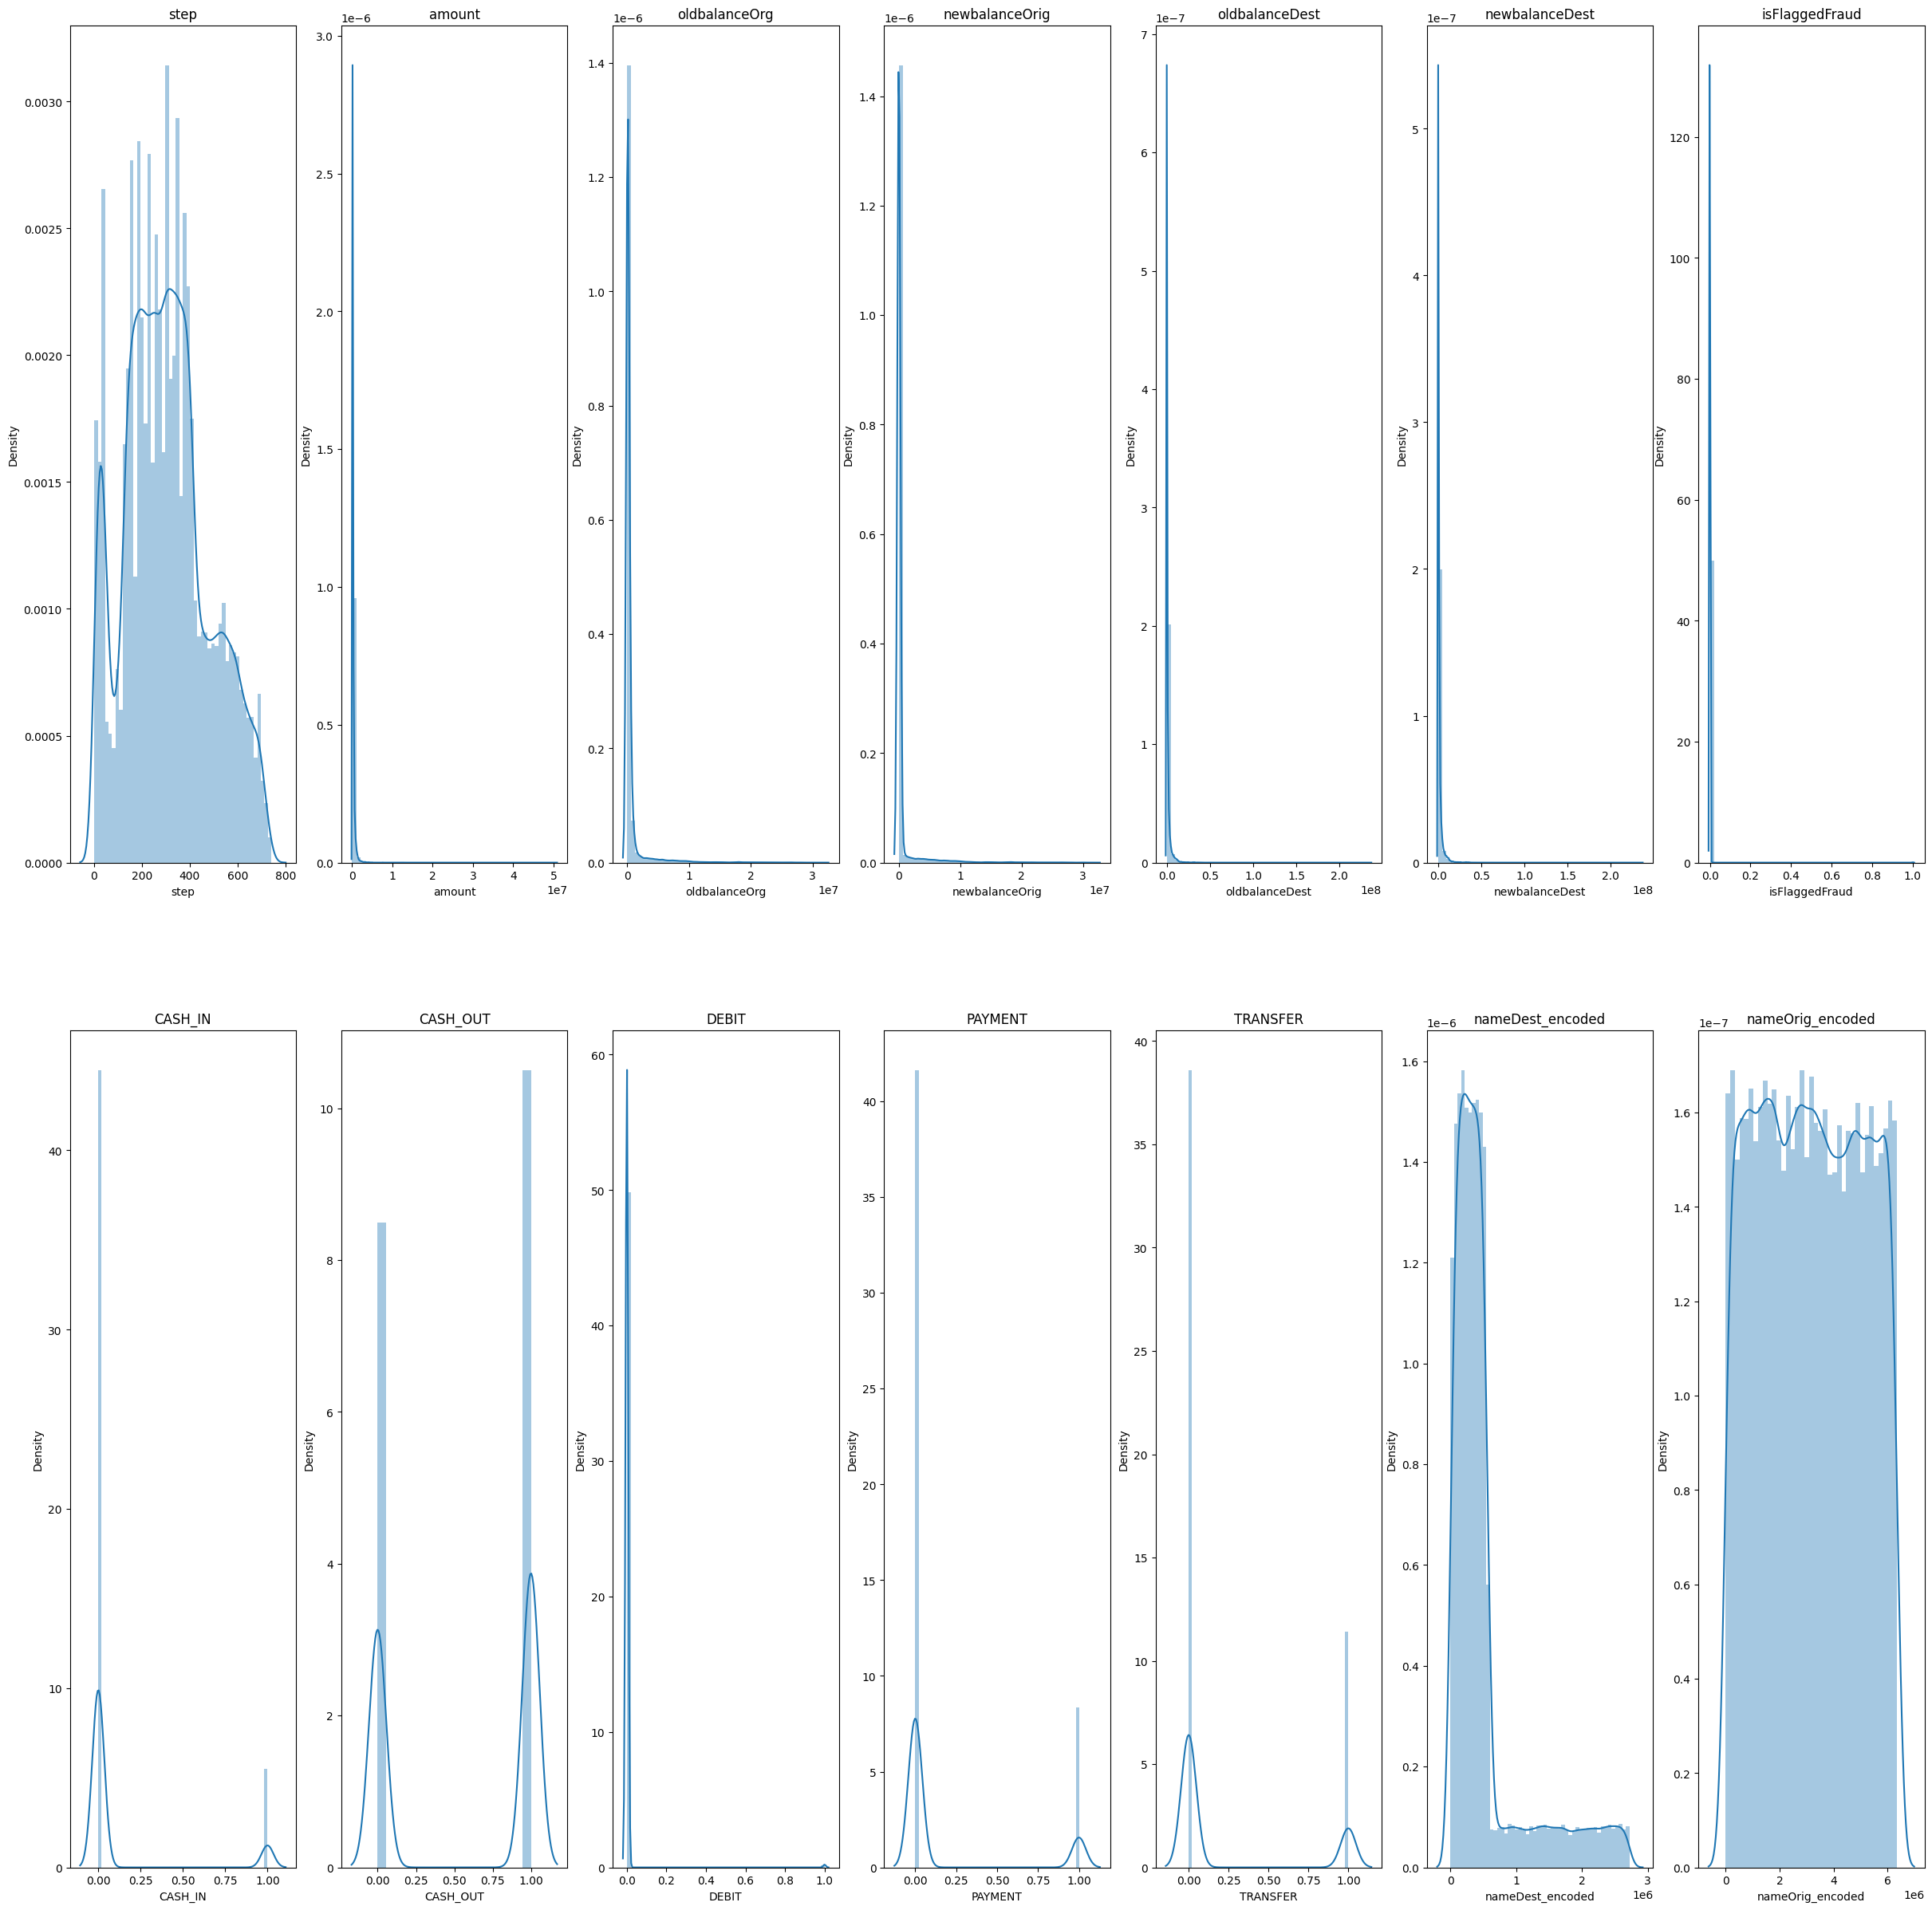

In [24]:
fig, axes = plt.subplots(nrows = 2, ncols = 7)   
axes = axes.flatten()        
fig.set_size_inches(30,30)

# cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, numerical_columns):
    print()
    sns.distplot(df_train[col], ax = ax)
    ax.set_title(col)

### 7. To get more clearity we also see the skewness in each of the numerical column


In [25]:
for col in numerical_columns:
    print(f" {df_train[col].skew() } in {col}")

 0.32907522436242387 in step
 32.68553090442 in amount
 7.542635502157765 in oldbalanceOrg
 7.525789126034026 in newbalanceOrig
 21.596917413135284 in oldbalanceDest
 19.9791308386168 in newbalanceDest
 50.38452366005486 in isFlaggedFraud
 2.4894972397745674 in CASH_IN
 -0.2130123782597912 in CASH_OUT
 16.954994847224686 in DEBIT
 1.7836909258082823 in PAYMENT
 1.2974895402177526 in TRANSFER
 2.181217674317024 in nameDest_encoded
 0.022616014163888646 in nameOrig_encoded


### 8. Next we see the count plot of each category i.e. basically the countplot


In [26]:
df.dtypes

step                  int64
amount              float64
oldbalanceOrg       float64
newbalanceOrig      float64
oldbalanceDest      float64
newbalanceDest      float64
isFlaggedFraud        int64
CASH_IN                bool
CASH_OUT               bool
DEBIT                  bool
PAYMENT                bool
TRANSFER               bool
nameDest_encoded      int64
nameOrig_encoded      int64
isFraud               int64
dtype: object

Text(0.5, 1.0, 'Count of categories in the label')

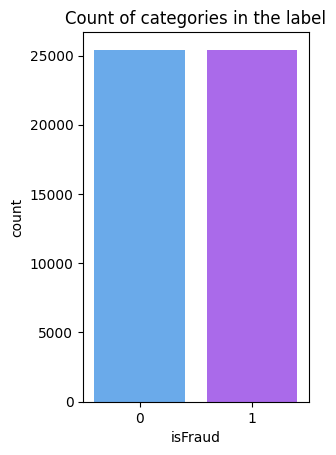

In [27]:
plt.subplot(1,2,1)
sns.countplot(x = 'isFraud' , palette= 'cool', data= output_col) 
plt.title("Count of categories in the label")

### 9. See the redundant values in a column


In [28]:
df_train[numerical_columns].describe(percentiles = [.25,.5,.75,.95,.97,.99])  


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
count,50829.000000,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,5.082900e+04,5.082900e+04
mean,305.693384,2.129561e+05,5.368273e+05,4.270252e+05,1.019196e+06,1.191137e+06,0.000393,0.110213,0.552952,0.003443,0.167208,0.227882,5.139591e+05,3.150544e+06
std,173.018394,4.760683e+05,2.069521e+06,2.104247e+06,3.522850e+06,3.708267e+06,0.019833,0.313158,0.497193,0.058576,0.373165,0.419470,5.885310e+05,1.838557e+06
min,1.000000,9.700000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+00,2.600000e+01
25%,181.000000,2.783538e+04,1.048624e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.769170e+05,1.555214e+06
50%,298.000000,1.057949e+05,6.282000e+04,0.000000e+00,3.767953e+04,2.428489e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.398270e+05,3.136695e+06
75%,404.000000,2.524101e+05,2.423399e+05,0.000000e+00,7.413421e+05,9.817932e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.056420e+05,4.752738e+06
95%,627.000000,7.440183e+05,2.080911e+06,2.005502e+06,4.880836e+06,5.332377e+06,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.093464e+06,6.044182e+06
97%,660.000000,9.647865e+05,4.753570e+06,4.889036e+06,7.325888e+06,7.746684e+06,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.354664e+06,6.161653e+06
99%,697.000000,1.575369e+06,1.025901e+07,1.044295e+07,1.235383e+07,1.294601e+07,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.597296e+06,6.281850e+06


## Modifications



## Encoding

## Making Model


In [29]:
X=df_train
Y=output_col

In [30]:
# rm -rf mlruns/.trash/*


# experiment = mlflow.get_experiment_by_name('PATH1')
# experiment_id = experiment.experiment_id
# mlflow.delete_experiment(experiment_id)

In [31]:
experiment_id = mlflow.create_experiment(
        name="PATH1",
        tags={"env": "dev", "version": "1.0.0"},
    )

In [32]:
    
avg_accuracies=defaultdict(list)
highest_accuracies=defaultdict(list)
# algorithms_to_be_tested=["LogisticRegression()","DecisionTreeClassifier()"]

algorithms_to_be_tested=["LogisticRegression()","DecisionTreeClassifier()","KNeighborsClassifier()","RandomForestClassifier()","SGDClassifier()","RidgeClassifierCV()","GaussianNB()"]
for al in algorithms_to_be_tested:
    avg_accuracies[al].append(0)# Accuracy
    avg_accuracies[al].append(0)# Precisoion
    avg_accuracies[al].append(0)# Recall
    avg_accuracies[al].append(0)#fbeta
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))

In [33]:
avg_accuracies

defaultdict(list,
            {'LogisticRegression()': [0, 0, 0, 0],
             'DecisionTreeClassifier()': [0, 0, 0, 0],
             'KNeighborsClassifier()': [0, 0, 0, 0],
             'RandomForestClassifier()': [0, 0, 0, 0],
             'SGDClassifier()': [0, 0, 0, 0],
             'RidgeClassifierCV()': [0, 0, 0, 0],
             'GaussianNB()': [0, 0, 0, 0]})

In [34]:
highest_accuracies

defaultdict(list,
            {'LogisticRegression()': [-inf, -inf, -inf, -inf],
             'DecisionTreeClassifier()': [-inf, -inf, -inf, -inf],
             'KNeighborsClassifier()': [-inf, -inf, -inf, -inf],
             'RandomForestClassifier()': [-inf, -inf, -inf, -inf],
             'SGDClassifier()': [-inf, -inf, -inf, -inf],
             'RidgeClassifierCV()': [-inf, -inf, -inf, -inf],
             'GaussianNB()': [-inf, -inf, -inf, -inf]})

In [35]:
metrics_history = defaultdict(lambda: defaultdict(list))


In [36]:
metrics_history

defaultdict(<function __main__.<lambda>()>, {})

In [37]:
def algo_testing(algo:str,test_size:float,X,Y,evaluation_metric:str,random_state,shuffle,iteration_number):
    model=eval(algo)
    evaluation_metric=eval(evaluation_metric)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=random_state,shuffle=shuffle)
   
    model.fit(X_train,Y_train)
    predicted=model.predict(X_test)
    
    accuracy=evaluation_metric(y_true=Y_test, y_pred=predicted)
    precision,recall,fbeta_score,support=precision_recall_fscore_support(y_true=Y_test,y_pred=predicted,labels=[0,1])
    metrics_history[algo]['accuracy'].append(accuracy)
    metrics_history[algo]['precision'].append(precision[1])
    metrics_history[algo]['recall'].append(recall[1])
    metrics_history[algo]['fbeta'].append(fbeta_score[1])
        
        
        
    print(f"{algo[:-2]}_train_accuracy_iteration_{iteration_number}", model.score(X_train, Y_train))
    mlflow.log_metric(f"{algo[:-2]}_test_accuracy_iteration_{iteration_number}", accuracy)
    mlflow.log_metric(f"{algo[:-2]}_precision_iteration_{iteration_number}", precision[1])
    mlflow.log_metric(f"{algo[:-2]}_recall_iteration_{iteration_number}", recall[1])
    mlflow.log_metric(f"{algo[:-2]}_fbeta_score_iteration_{iteration_number}", fbeta_score[1])

    
    
    print(f"Training accuracy of {model} at iteration number {iteration_number} is ", model.score(X_train,Y_train))
    print(f"Testing accuracy of {model} at iteration number {iteration_number} is ",accuracy)
    cl=classification_report(y_true=Y_test,y_pred=predicted)
    print(cl)
    
    if accuracy>highest_accuracies[algo][0]:
        
        highest_accuracies[algo][0]=accuracy
        highest_accuracies[algo][1]=precision[1]
        highest_accuracies[algo][2]=recall[1]
        highest_accuracies[algo][2]=fbeta_score[1]

        print(f"New_highest is reached at iteration number {iteration_number} ",'\n',accuracy,precision,recall)
    avg_accuracies[algo][0]+=accuracy
    avg_accuracies[algo][1]+=precision[1]
    avg_accuracies[algo][2]+=recall[1]
    avg_accuracies[algo][2]+=fbeta_score[1]
    print()
    print("--------------------------------------------------------")
    print(f"At Iteration {iteration_number}")
    print(avg_accuracies)
    cm = confusion_matrix(y_true=Y_test, y_pred=predicted, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure object
    disp.plot(ax=ax)  # Plot the confusion matrix on the figure
    plt.show()
    mlflow.log_figure(fig, f"metrics/{algo}_{iteration_number}_confusion_matrix.png")

    

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_train_accuracy_iteration_1 0.9365762486781595
Training accuracy of LogisticRegression() at iteration number 1 is  0.9365762486781595
Testing accuracy of LogisticRegression() at iteration number 1 is  0.9362581152862482
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5052
           1       0.93      0.94      0.94      5114

    accuracy                           0.94     10166
   macro avg       0.94      0.94      0.94     10166
weighted avg       0.94      0.94      0.94     10166

New_highest is reached at iteration number 1  
 0.9362581152862482 [0.93864542 0.93392927] [0.93269992 0.93977317]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862482, 0.9339292654488923, 1.8766152769487272, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDC

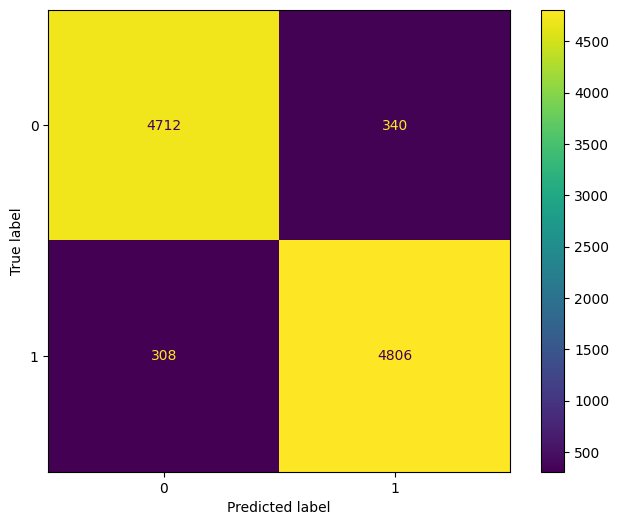

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_train_accuracy_iteration_2 0.9365762486781595
Training accuracy of LogisticRegression() at iteration number 2 is  0.9365762486781595
Testing accuracy of LogisticRegression() at iteration number 2 is  0.9362581152862482
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5052
           1       0.93      0.94      0.94      5114

    accuracy                           0.94     10166
   macro avg       0.94      0.94      0.94     10166
weighted avg       0.94      0.94      0.94     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [1.8725162305724965, 1.8678585308977846, 3.7532305538974544, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


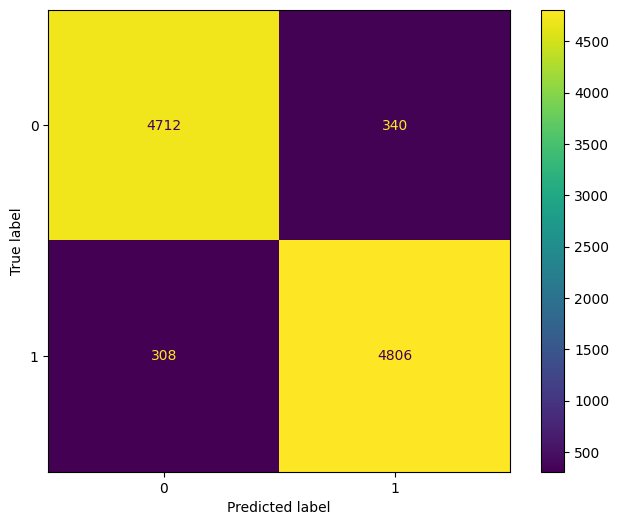

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_train_accuracy_iteration_3 0.9365762486781595
Training accuracy of LogisticRegression() at iteration number 3 is  0.9365762486781595
Testing accuracy of LogisticRegression() at iteration number 3 is  0.9362581152862482
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5052
           1       0.93      0.94      0.94      5114

    accuracy                           0.94     10166
   macro avg       0.94      0.94      0.94     10166
weighted avg       0.94      0.94      0.94     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [2.808774345858745, 2.801787796346677, 5.629845830846182, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


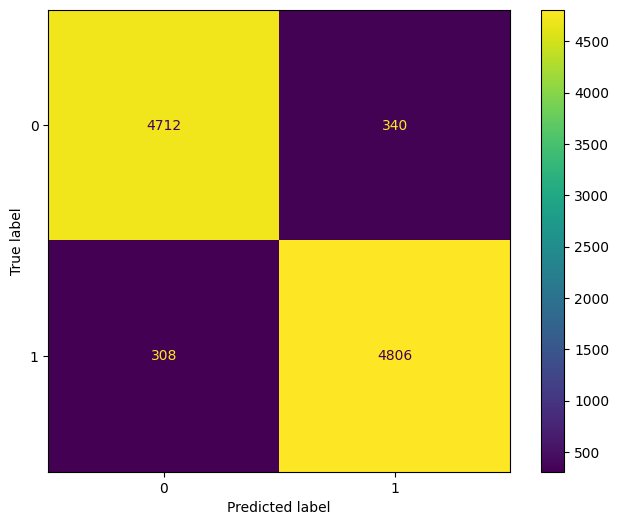

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_train_accuracy_iteration_4 0.9365762486781595
Training accuracy of LogisticRegression() at iteration number 4 is  0.9365762486781595
Testing accuracy of LogisticRegression() at iteration number 4 is  0.9362581152862482
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5052
           1       0.93      0.94      0.94      5114

    accuracy                           0.94     10166
   macro avg       0.94      0.94      0.94     10166
weighted avg       0.94      0.94      0.94     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [3.745032461144993, 3.7357170617955693, 7.506461107794908, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


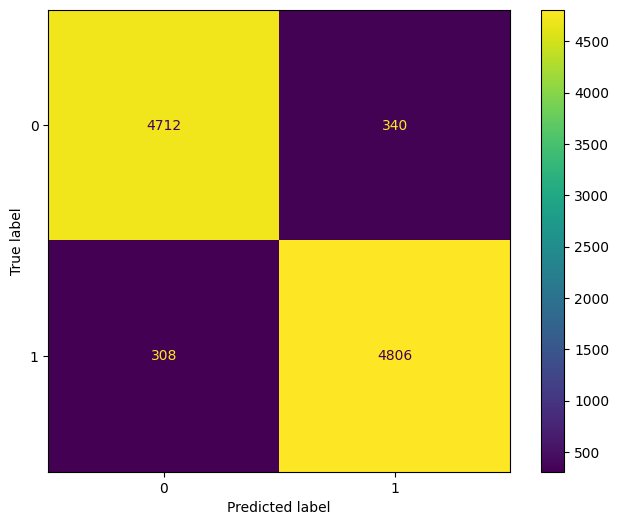

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_train_accuracy_iteration_5 0.9365762486781595
Training accuracy of LogisticRegression() at iteration number 5 is  0.9365762486781595
Testing accuracy of LogisticRegression() at iteration number 5 is  0.9362581152862482
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5052
           1       0.93      0.94      0.94      5114

    accuracy                           0.94     10166
   macro avg       0.94      0.94      0.94     10166
weighted avg       0.94      0.94      0.94     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [4.681290576431241, 4.669646327244462, 9.383076384743635, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


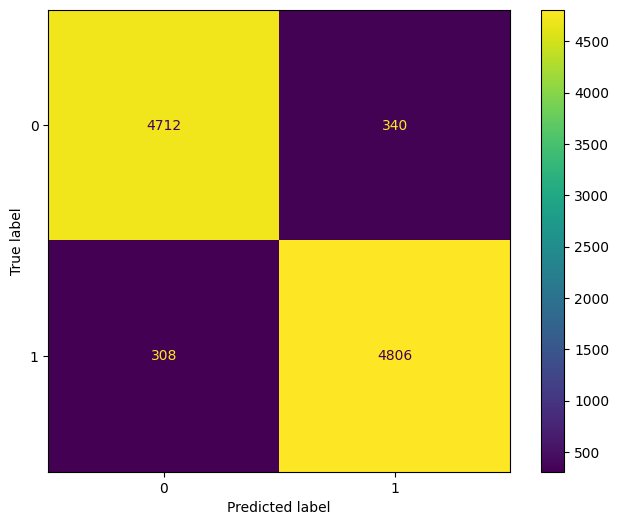

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_train_accuracy_iteration_6 0.9365762486781595
Training accuracy of LogisticRegression() at iteration number 6 is  0.9365762486781595
Testing accuracy of LogisticRegression() at iteration number 6 is  0.9362581152862482
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5052
           1       0.93      0.94      0.94      5114

    accuracy                           0.94     10166
   macro avg       0.94      0.94      0.94     10166
weighted avg       0.94      0.94      0.94     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [5.61754869171749, 5.603575592693354, 11.259691661692363, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


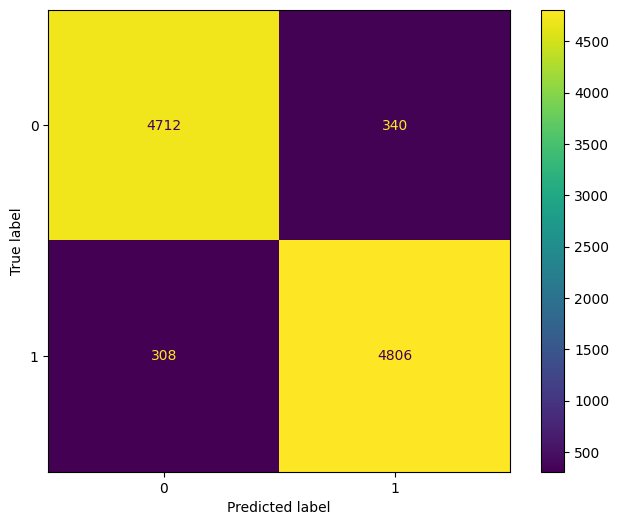

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_train_accuracy_iteration_7 0.9365762486781595
Training accuracy of LogisticRegression() at iteration number 7 is  0.9365762486781595
Testing accuracy of LogisticRegression() at iteration number 7 is  0.9362581152862482
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5052
           1       0.93      0.94      0.94      5114

    accuracy                           0.94     10166
   macro avg       0.94      0.94      0.94     10166
weighted avg       0.94      0.94      0.94     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [6.553806807003738, 6.537504858142246, 13.136306938641091, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


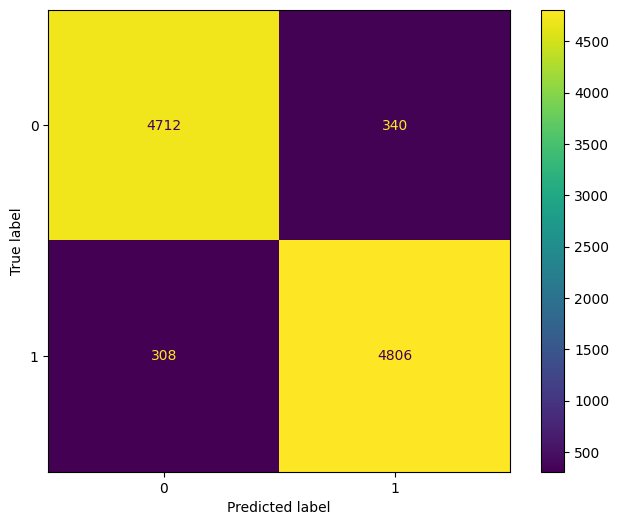

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_train_accuracy_iteration_8 0.9365762486781595
Training accuracy of LogisticRegression() at iteration number 8 is  0.9365762486781595
Testing accuracy of LogisticRegression() at iteration number 8 is  0.9362581152862482
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5052
           1       0.93      0.94      0.94      5114

    accuracy                           0.94     10166
   macro avg       0.94      0.94      0.94     10166
weighted avg       0.94      0.94      0.94     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [7.490064922289987, 7.471434123591139, 15.01292221558982, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


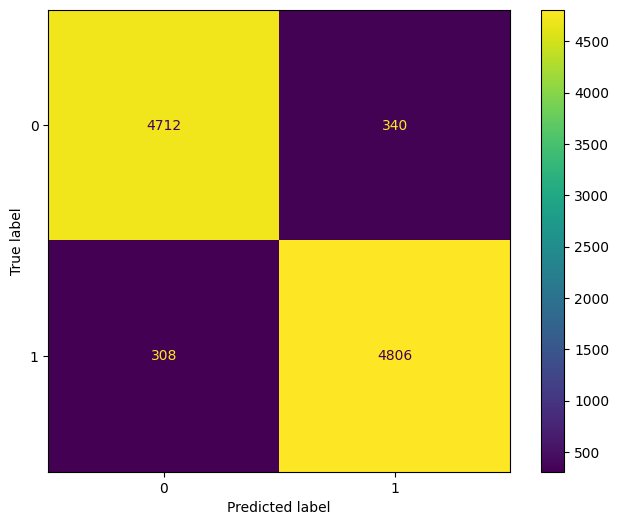

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_train_accuracy_iteration_9 0.9365762486781595
Training accuracy of LogisticRegression() at iteration number 9 is  0.9365762486781595
Testing accuracy of LogisticRegression() at iteration number 9 is  0.9362581152862482
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5052
           1       0.93      0.94      0.94      5114

    accuracy                           0.94     10166
   macro avg       0.94      0.94      0.94     10166
weighted avg       0.94      0.94      0.94     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [8.426323037576235, 8.405363389040032, 16.889537492538548, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


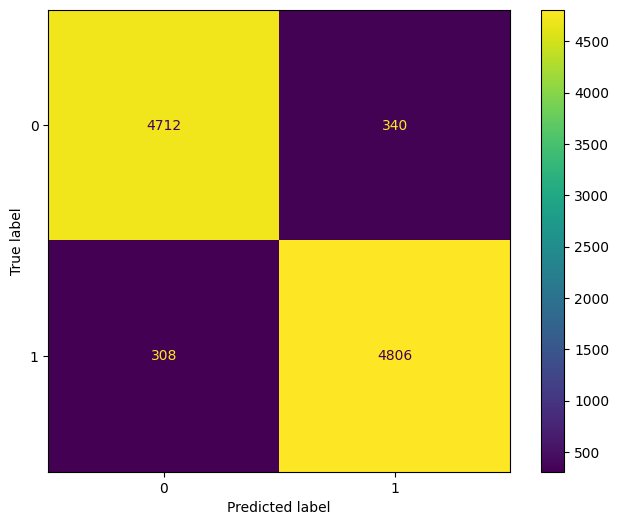

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression_train_accuracy_iteration_10 0.9365762486781595
Training accuracy of LogisticRegression() at iteration number 10 is  0.9365762486781595
Testing accuracy of LogisticRegression() at iteration number 10 is  0.9362581152862482
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5052
           1       0.93      0.94      0.94      5114

    accuracy                           0.94     10166
   macro avg       0.94      0.94      0.94     10166
weighted avg       0.94      0.94      0.94     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [9.362581152862484, 9.339292654488924, 18.766152769487274, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


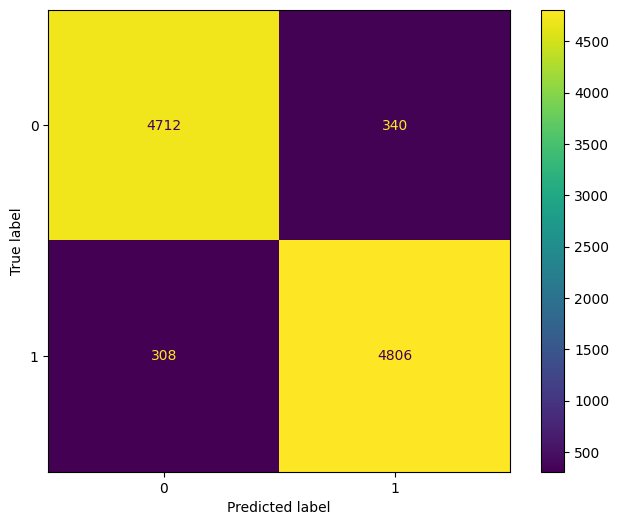

DecisionTreeClassifier_train_accuracy_iteration_1 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 1 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 1 is  0.9929175683651387
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5052
           1       0.99      0.99      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166

New_highest is reached at iteration number 1  
 0.9929175683651387 [0.99424375 0.99161466] [0.99148852 0.99432929]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9929175683651387, 0.9916146645865834, 1.9872994151620726, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomFores

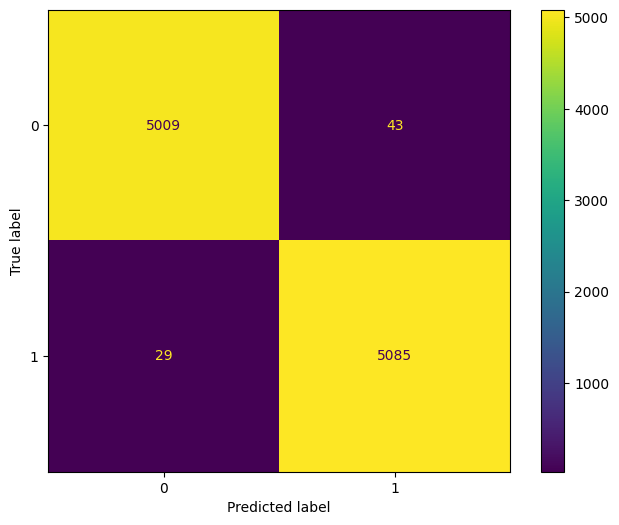

DecisionTreeClassifier_train_accuracy_iteration_2 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 2 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 2 is  0.992819201259099
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5052
           1       0.99      0.99      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [1.9857367696242376, 1.9836115414165658, 3.973911086941373, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [

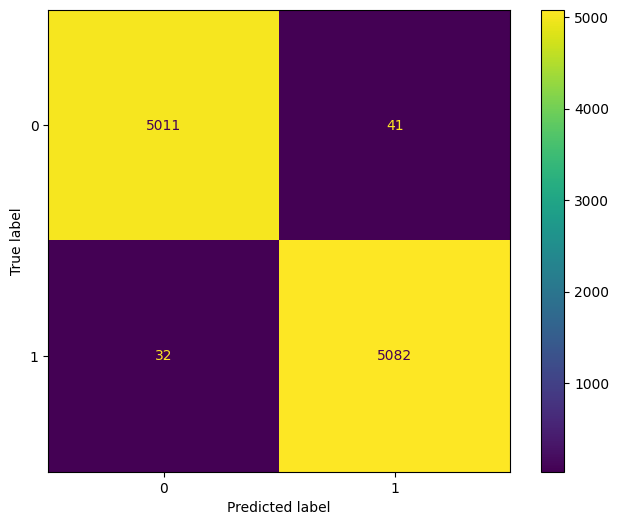

DecisionTreeClassifier_train_accuracy_iteration_3 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 3 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 3 is  0.99242573283494
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5052
           1       0.99      0.99      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [2.9781625024591776, 2.975026175562907, 5.95993794682817, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 

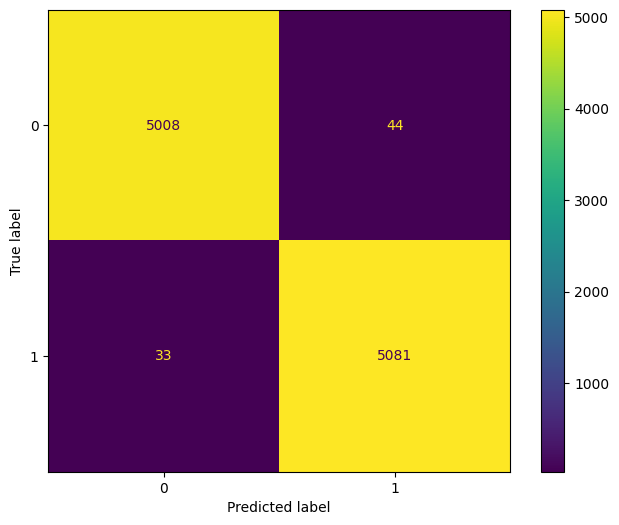

DecisionTreeClassifier_train_accuracy_iteration_4 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 4 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 4 is  0.9920322644107811
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5052
           1       0.99      0.99      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [3.970194766869959, 3.965667626138068, 7.945577232865763, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0

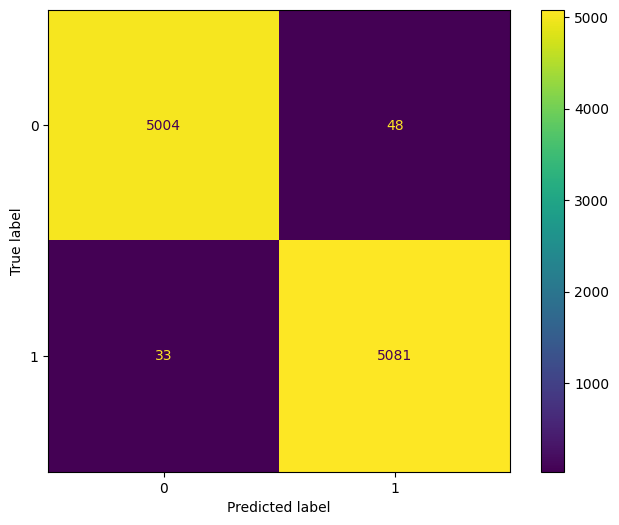

DecisionTreeClassifier_train_accuracy_iteration_5 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 5 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 5 is  0.9925240999409798
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5052
           1       0.99      0.99      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [4.962718866810938, 4.957083935150943, 9.931898025053874, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0

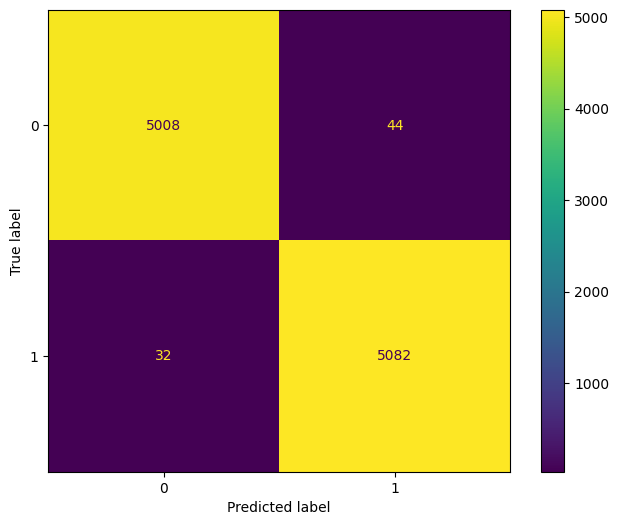

DecisionTreeClassifier_train_accuracy_iteration_6 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 6 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 6 is  0.9925240999409798
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5052
           1       0.99      0.99      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [5.955242966751918, 5.948117073552503, 11.918612798580604, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [

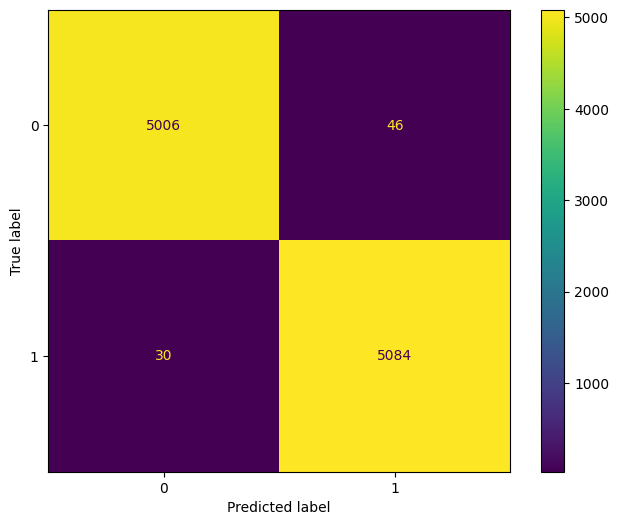

DecisionTreeClassifier_train_accuracy_iteration_7 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 7 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 7 is  0.9929175683651387
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5052
           1       0.99      0.99      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [6.948160535117056, 6.93992355033752, 13.905715299069458, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0

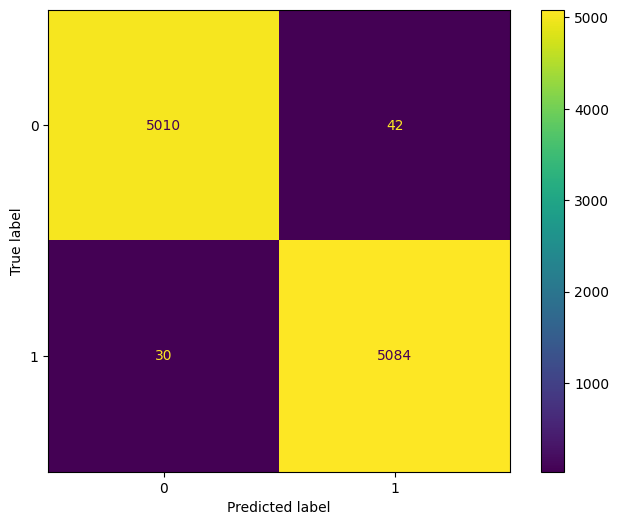

DecisionTreeClassifier_train_accuracy_iteration_8 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 8 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 8 is  0.9929175683651387
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5052
           1       0.99      0.99      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [7.9410781034821945, 7.932114100903705, 15.892423968602234, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': 

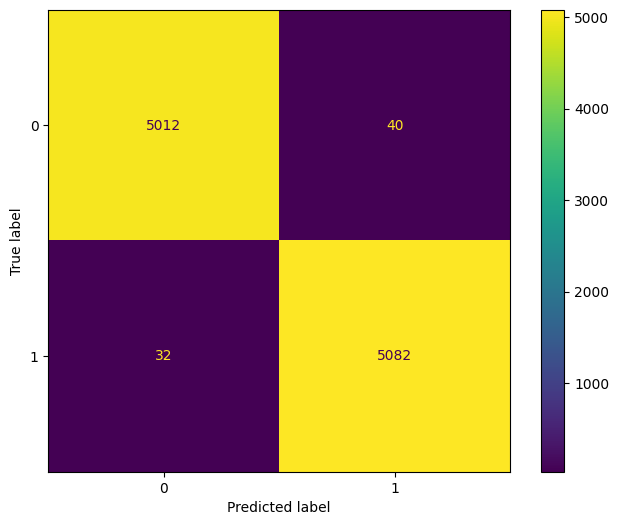

DecisionTreeClassifier_train_accuracy_iteration_9 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 9 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 9 is  0.9921306315168208
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5052
           1       0.99      0.99      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [8.933208734999015, 8.923715663403705, 17.877371847217987, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [

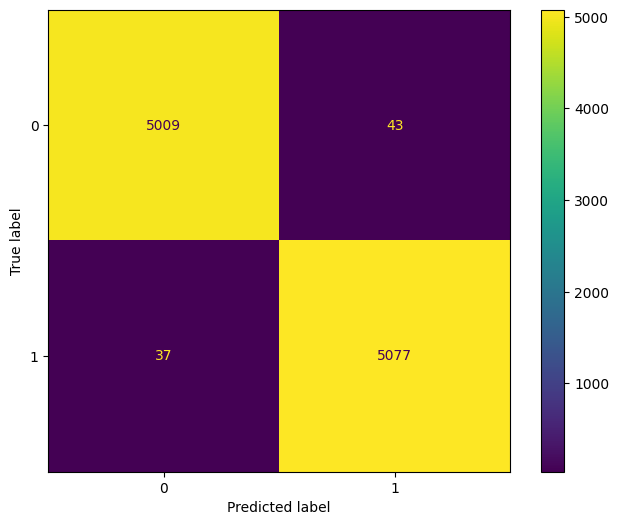

DecisionTreeClassifier_train_accuracy_iteration_10 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 10 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 10 is  0.9926224670470195
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5052
           1       0.99      0.99      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [9.925831202046034, 9.914942023317918, 19.864183524095594, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()

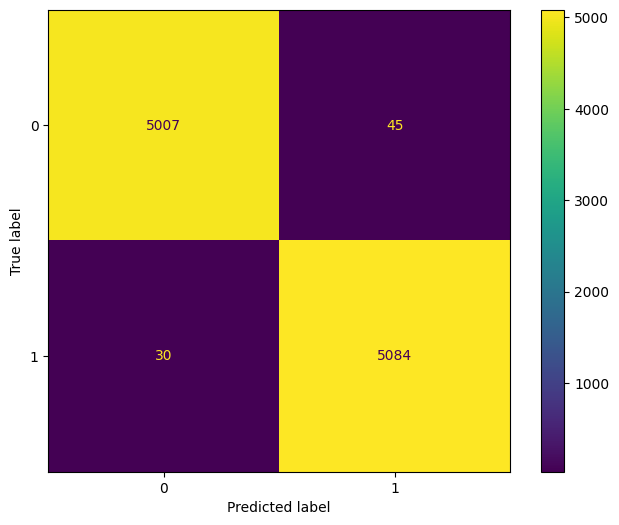

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier_train_accuracy_iteration_1 0.9534712146177114
Training accuracy of KNeighborsClassifier() at iteration number 1 is  0.9534712146177114
Testing accuracy of KNeighborsClassifier() at iteration number 1 is  0.9320283297265395
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      5052
           1       0.89      0.99      0.94      5114

    accuracy                           0.93     10166
   macro avg       0.94      0.93      0.93     10166
weighted avg       0.94      0.93      0.93     10166

New_highest is reached at iteration number 1  
 0.9320283297265395 [0.98748044 0.88845951] [0.87430721 0.98904967]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': 

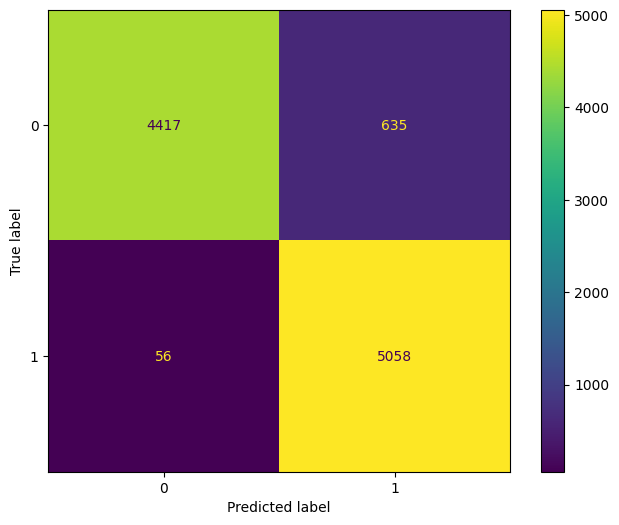

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier_train_accuracy_iteration_2 0.9534712146177114
Training accuracy of KNeighborsClassifier() at iteration number 2 is  0.9534712146177114
Testing accuracy of KNeighborsClassifier() at iteration number 2 is  0.9320283297265395
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      5052
           1       0.89      0.99      0.94      5114

    accuracy                           0.93     10166
   macro avg       0.94      0.93      0.93     10166
weighted avg       0.94      0.93      0.93     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [1.864056659453079, 1.7769190233620236, 3.8502192574309895, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClass

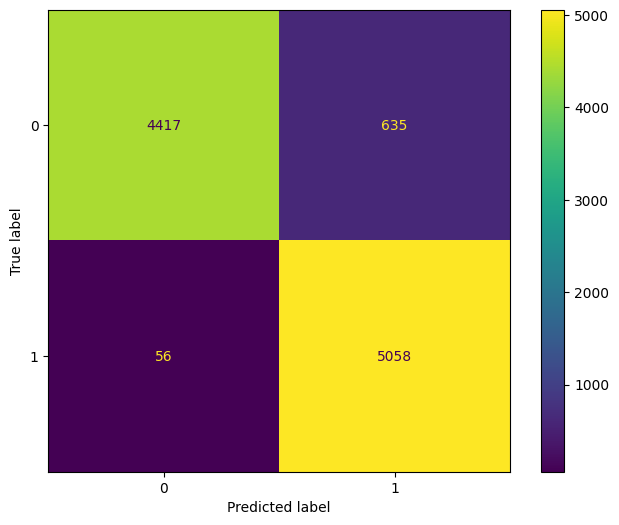

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier_train_accuracy_iteration_3 0.9534712146177114
Training accuracy of KNeighborsClassifier() at iteration number 3 is  0.9534712146177114
Testing accuracy of KNeighborsClassifier() at iteration number 3 is  0.9320283297265395
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      5052
           1       0.89      0.99      0.94      5114

    accuracy                           0.93     10166
   macro avg       0.94      0.93      0.93     10166
weighted avg       0.94      0.93      0.93     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [2.7960849891796187, 2.6653785350430352, 5.775328886146484, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClass

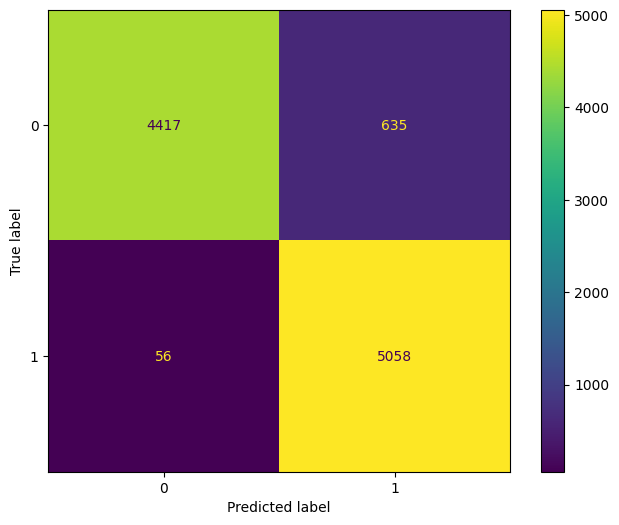

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier_train_accuracy_iteration_4 0.9534712146177114
Training accuracy of KNeighborsClassifier() at iteration number 4 is  0.9534712146177114
Testing accuracy of KNeighborsClassifier() at iteration number 4 is  0.9320283297265395
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      5052
           1       0.89      0.99      0.94      5114

    accuracy                           0.93     10166
   macro avg       0.94      0.93      0.93     10166
weighted avg       0.94      0.93      0.93     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [3.728113318906158, 3.553838046724047, 7.700438514861979, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassif

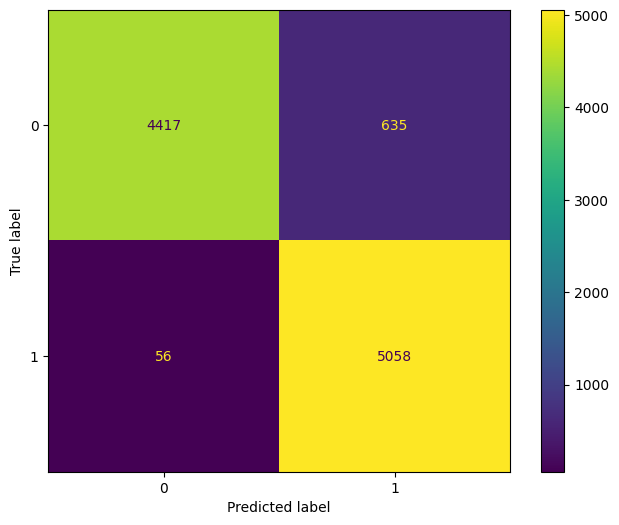

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier_train_accuracy_iteration_5 0.9534712146177114
Training accuracy of KNeighborsClassifier() at iteration number 5 is  0.9534712146177114
Testing accuracy of KNeighborsClassifier() at iteration number 5 is  0.9320283297265395
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      5052
           1       0.89      0.99      0.94      5114

    accuracy                           0.93     10166
   macro avg       0.94      0.93      0.93     10166
weighted avg       0.94      0.93      0.93     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [4.660141648632697, 4.442297558405059, 9.625548143577475, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassif

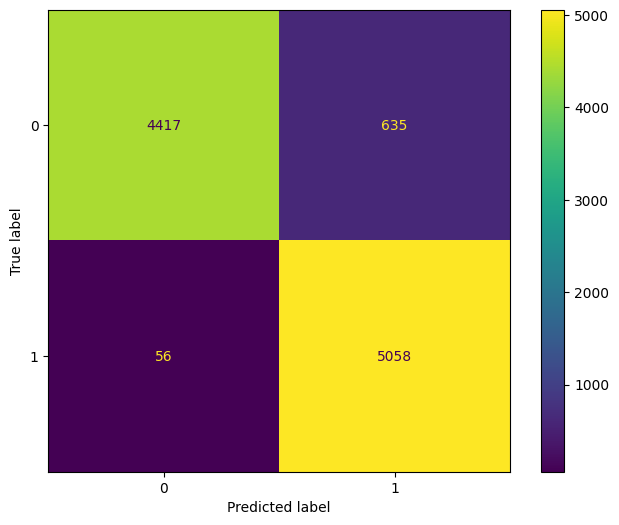

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier_train_accuracy_iteration_6 0.9534712146177114
Training accuracy of KNeighborsClassifier() at iteration number 6 is  0.9534712146177114
Testing accuracy of KNeighborsClassifier() at iteration number 6 is  0.9320283297265395
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      5052
           1       0.89      0.99      0.94      5114

    accuracy                           0.93     10166
   macro avg       0.94      0.93      0.93     10166
weighted avg       0.94      0.93      0.93     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [5.5921699783592365, 5.3307570700860705, 11.550657772292972, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClas

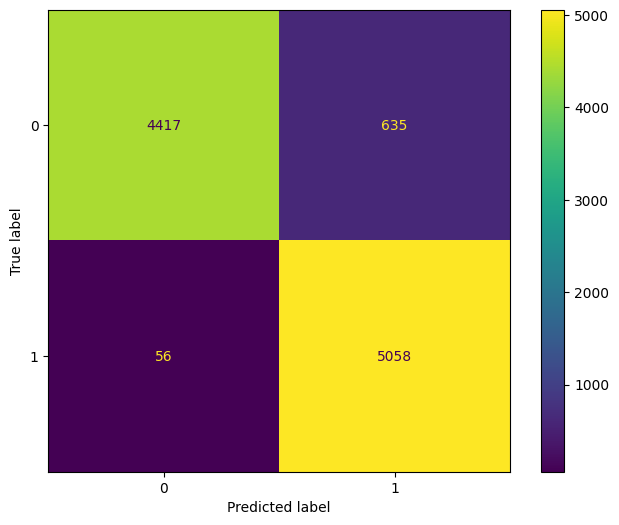

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier_train_accuracy_iteration_7 0.9534712146177114
Training accuracy of KNeighborsClassifier() at iteration number 7 is  0.9534712146177114
Testing accuracy of KNeighborsClassifier() at iteration number 7 is  0.9320283297265395
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      5052
           1       0.89      0.99      0.94      5114

    accuracy                           0.93     10166
   macro avg       0.94      0.93      0.93     10166
weighted avg       0.94      0.93      0.93     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [6.524198308085776, 6.219216581767082, 13.475767401008468, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassi

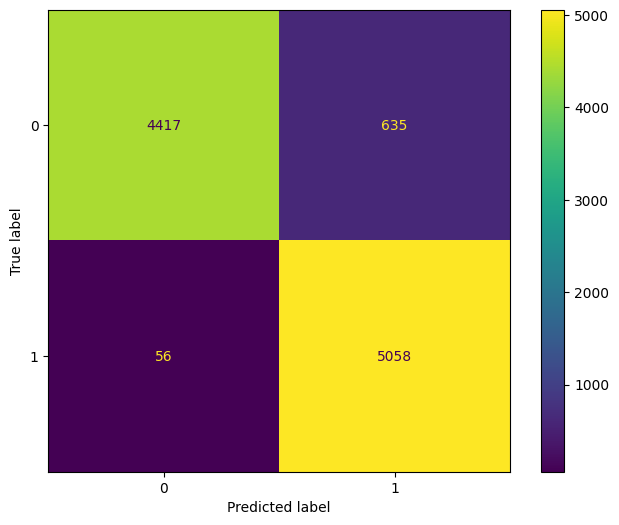

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier_train_accuracy_iteration_8 0.9534712146177114
Training accuracy of KNeighborsClassifier() at iteration number 8 is  0.9534712146177114
Testing accuracy of KNeighborsClassifier() at iteration number 8 is  0.9320283297265395
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      5052
           1       0.89      0.99      0.94      5114

    accuracy                           0.93     10166
   macro avg       0.94      0.93      0.93     10166
weighted avg       0.94      0.93      0.93     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [7.456226637812315, 7.107676093448093, 15.400877029723965, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassi

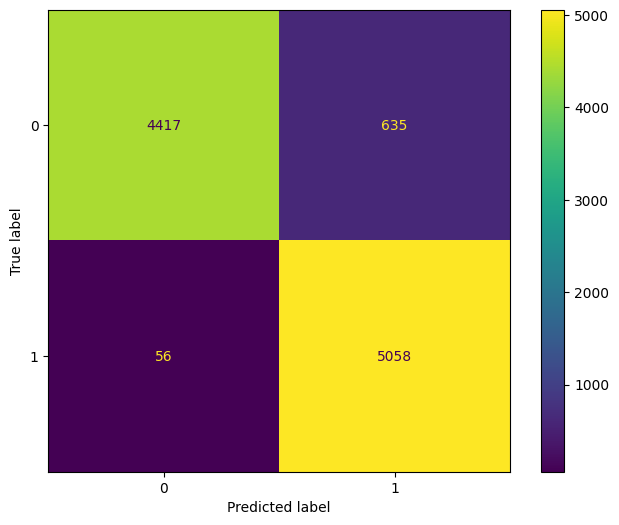

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier_train_accuracy_iteration_9 0.9534712146177114
Training accuracy of KNeighborsClassifier() at iteration number 9 is  0.9534712146177114
Testing accuracy of KNeighborsClassifier() at iteration number 9 is  0.9320283297265395
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      5052
           1       0.89      0.99      0.94      5114

    accuracy                           0.93     10166
   macro avg       0.94      0.93      0.93     10166
weighted avg       0.94      0.93      0.93     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [8.388254967538854, 7.996135605129105, 17.32598665843946, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassif

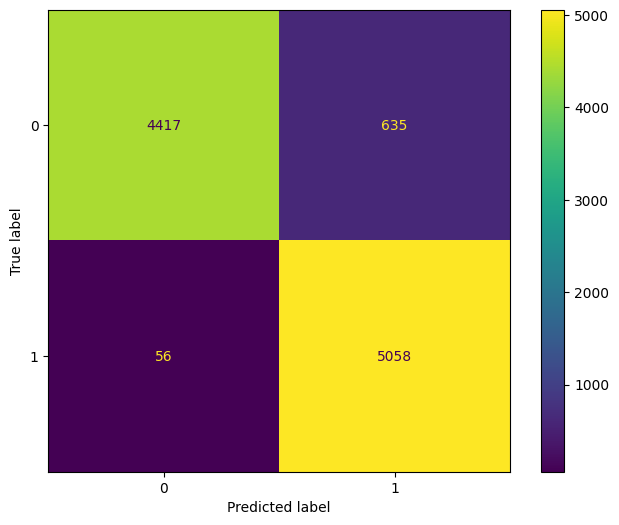

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier_train_accuracy_iteration_10 0.9534712146177114
Training accuracy of KNeighborsClassifier() at iteration number 10 is  0.9534712146177114
Testing accuracy of KNeighborsClassifier() at iteration number 10 is  0.9320283297265395
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      5052
           1       0.89      0.99      0.94      5114

    accuracy                           0.93     10166
   macro avg       0.94      0.93      0.93     10166
weighted avg       0.94      0.93      0.93     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [9.320283297265394, 8.884595116810116, 19.251096287154958, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDCl

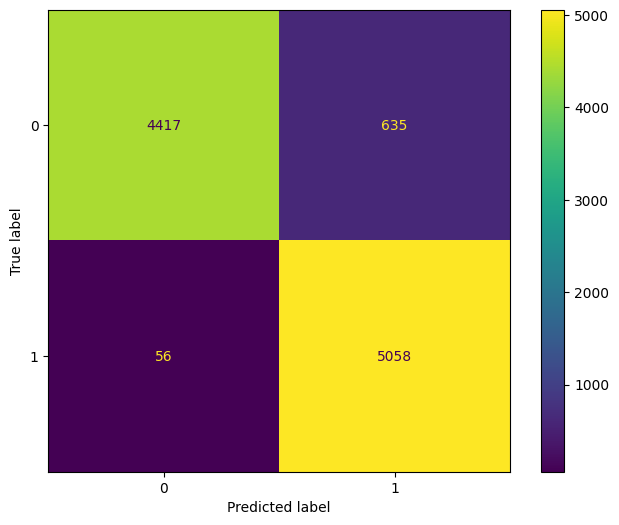

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier_train_accuracy_iteration_1 1.0
Training accuracy of RandomForestClassifier() at iteration number 1 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 1 is  0.9913436946685028
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5052
           1       0.99      1.00      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166

New_highest is reached at iteration number 1  
 0.9913436946685028 [0.99501396 0.98777174] [0.98752969 0.99511146]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8

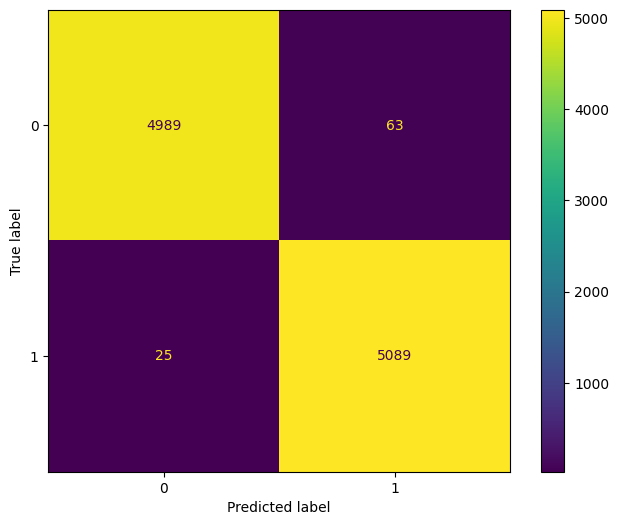

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier_train_accuracy_iteration_2 1.0
Training accuracy of RandomForestClassifier() at iteration number 2 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 2 is  0.9912453275624631
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5052
           1       0.99      1.00      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [1.982589022230966, 1.97516262176865, 3.9731

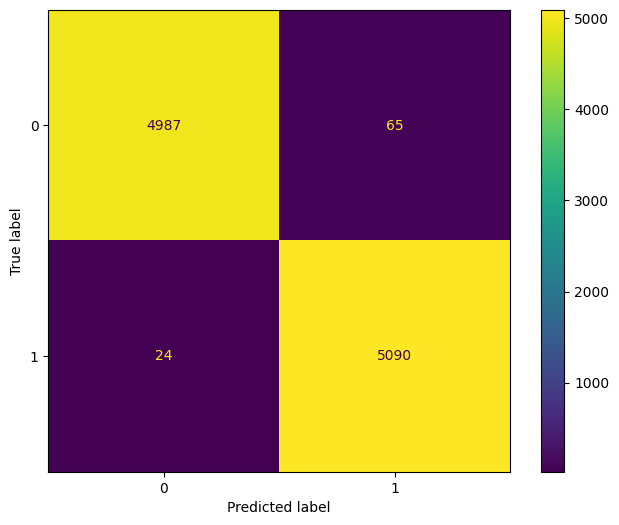

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier_train_accuracy_iteration_3 1.0
Training accuracy of RandomForestClassifier() at iteration number 3 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 3 is  0.9916387959866221
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5052
           1       0.99      1.00      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166

New_highest is reached at iteration number 3  
 0.9916387959866221 [0.99521436 0.98815764] [0.98792557 0.995307  ]

--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8

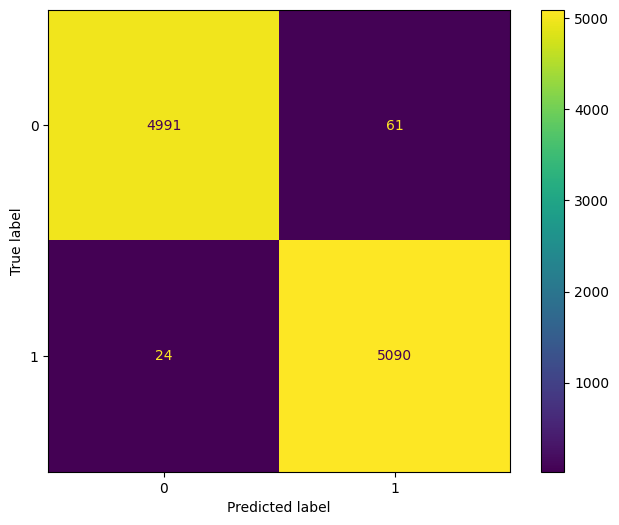

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier_train_accuracy_iteration_4 1.0
Training accuracy of RandomForestClassifier() at iteration number 4 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 4 is  0.9917371630926618
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5052
           1       0.99      1.00      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166

New_highest is reached at iteration number 4  
 0.9917371630926618 [0.99521531 0.98834951] [0.98812352 0.995307  ]

--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8

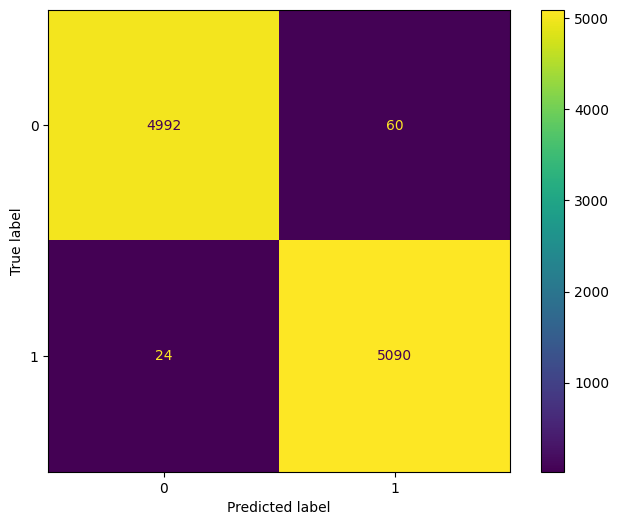

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier_train_accuracy_iteration_5 1.0
Training accuracy of RandomForestClassifier() at iteration number 5 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 5 is  0.9921306315168208
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5052
           1       0.99      1.00      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166

New_highest is reached at iteration number 5  
 0.9921306315168208 [0.9954165  0.98892774] [0.98871734 0.99550254]

--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8

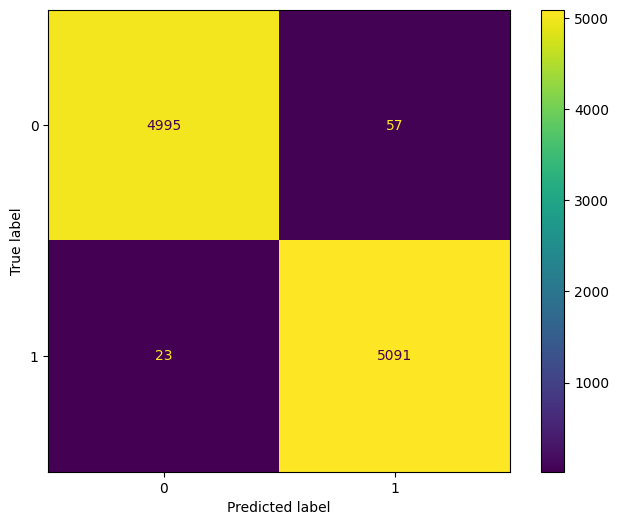

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier_train_accuracy_iteration_6 1.0
Training accuracy of RandomForestClassifier() at iteration number 6 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 6 is  0.9917371630926618
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5052
           1       0.99      0.99      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [5.949832775919732, 5.929326624541177, 11.92

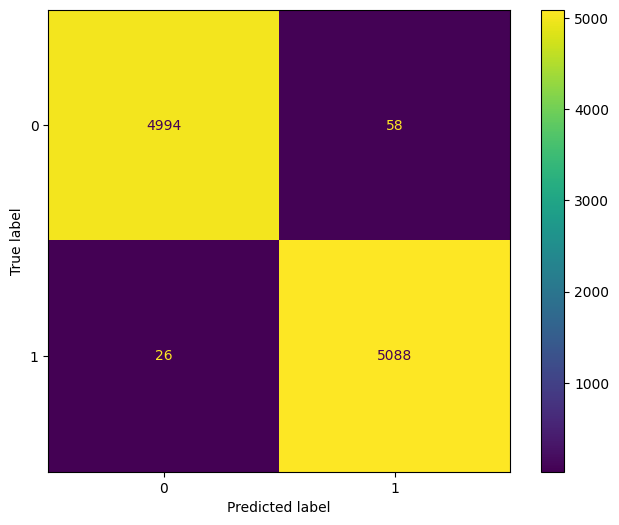

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier_train_accuracy_iteration_7 1.0
Training accuracy of RandomForestClassifier() at iteration number 7 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 7 is  0.9913436946685028
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5052
           1       0.99      1.00      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [6.941176470588235, 6.917098363671611, 13.90

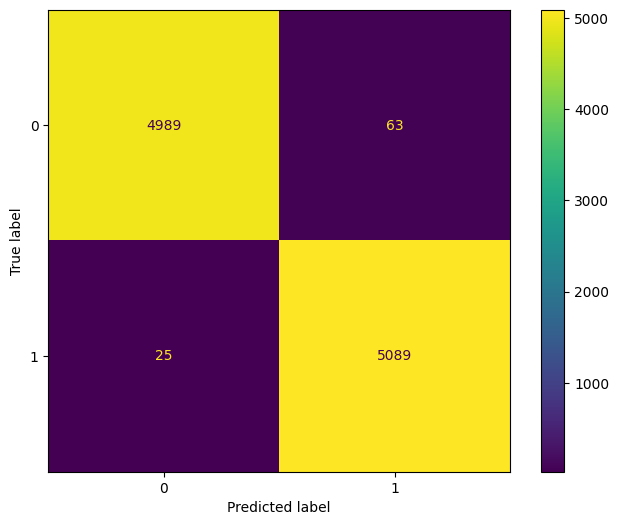

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier_train_accuracy_iteration_8 1.0
Training accuracy of RandomForestClassifier() at iteration number 8 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 8 is  0.9917371630926618
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5052
           1       0.99      1.00      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [7.932913633680896, 7.90563760221085, 15.895

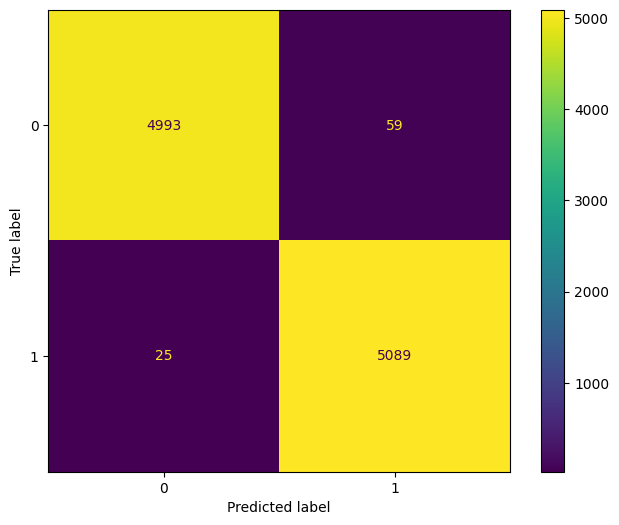

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier_train_accuracy_iteration_9 1.0
Training accuracy of RandomForestClassifier() at iteration number 9 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 9 is  0.9912453275624631
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5052
           1       0.99      0.99      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [8.924158961243359, 8.893406967382662, 17.88

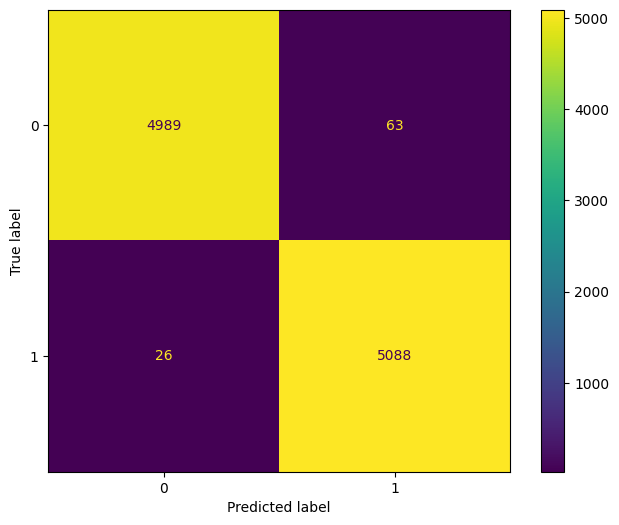

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier_train_accuracy_iteration_10 1.0
Training accuracy of RandomForestClassifier() at iteration number 10 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 10 is  0.9916387959866221
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5052
           1       0.99      1.00      0.99      5114

    accuracy                           0.99     10166
   macro avg       0.99      0.99      0.99     10166
weighted avg       0.99      0.99      0.99     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [9.915797757229981, 9.881564606676003, 1

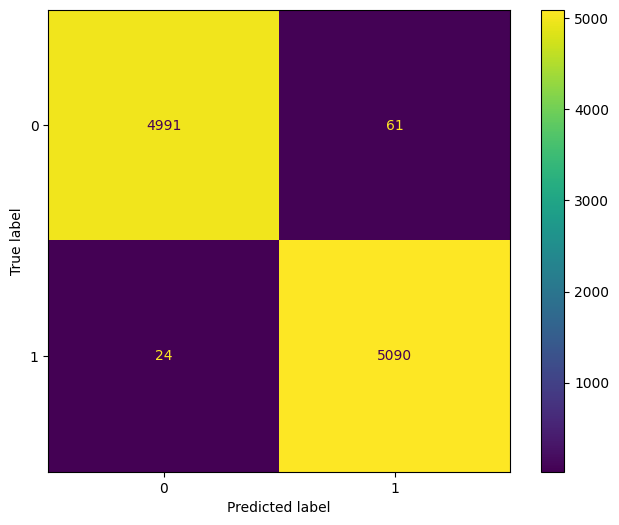

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier_train_accuracy_iteration_1 0.8951380862208888
Training accuracy of SGDClassifier() at iteration number 1 is  0.8951380862208888
Testing accuracy of SGDClassifier() at iteration number 1 is  0.8944520952193586
              precision    recall  f1-score   support

           0       0.98      0.81      0.88      5052
           1       0.84      0.98      0.90      5114

    accuracy                           0.89     10166
   macro avg       0.91      0.89      0.89     10166
weighted avg       0.91      0.89      0.89     10166

New_highest is reached at iteration number 1  
 0.8944520952193586 [0.97859033 0.83624563] [0.80522565 0.98259679]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 

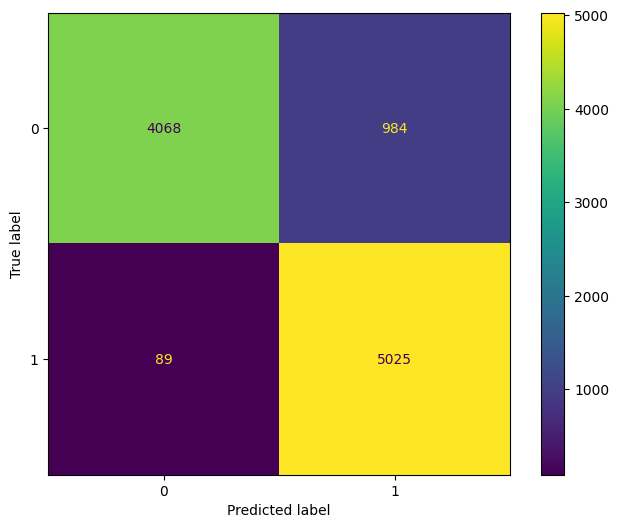

SGDClassifier_train_accuracy_iteration_2 0.8865553451540713
Training accuracy of SGDClassifier() at iteration number 2 is  0.8865553451540713
Testing accuracy of SGDClassifier() at iteration number 2 is  0.8861892583120204
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5052
           1       0.94      0.82      0.88      5114

    accuracy                           0.89     10166
   macro avg       0.89      0.89      0.89     10166
weighted avg       0.89      0.89      0.89     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.9881564606676003, 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


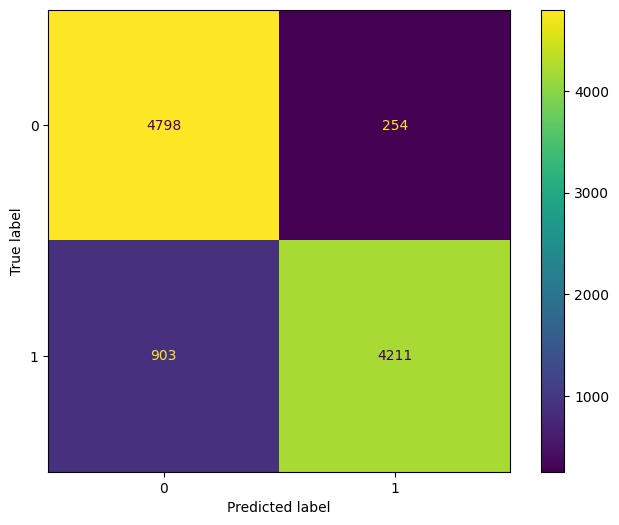

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier_train_accuracy_iteration_3 0.8804318422152817
Training accuracy of SGDClassifier() at iteration number 3 is  0.8804318422152817
Testing accuracy of SGDClassifier() at iteration number 3 is  0.8778280542986425
              precision    recall  f1-score   support

           0       0.96      0.79      0.86      5052
           1       0.82      0.97      0.89      5114

    accuracy                           0.88     10166
   macro avg       0.89      0.88      0.88     10166
weighted avg       0.89      0.88      0.88     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.9881564606676003, 

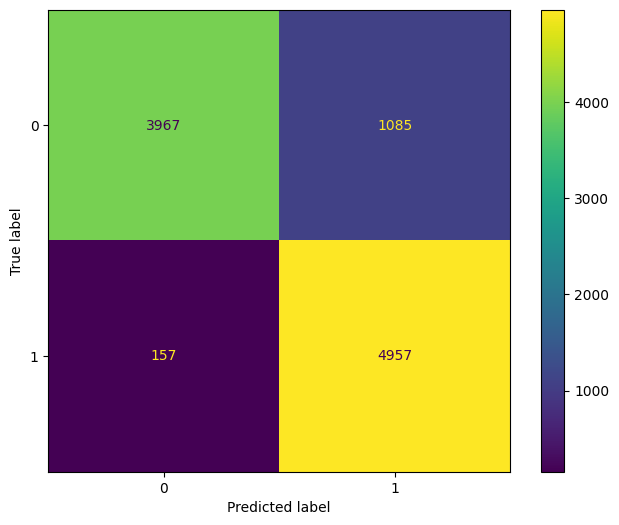

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier_train_accuracy_iteration_4 0.9048274844453188
Training accuracy of SGDClassifier() at iteration number 4 is  0.9048274844453188
Testing accuracy of SGDClassifier() at iteration number 4 is  0.904190438717293
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      5052
           1       0.85      0.98      0.91      5114

    accuracy                           0.90     10166
   macro avg       0.91      0.90      0.90     10166
weighted avg       0.91      0.90      0.90     10166

New_highest is reached at iteration number 4  
 0.904190438717293 [0.97484863 0.85252044] [0.82858274 0.9788815 ]

--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.

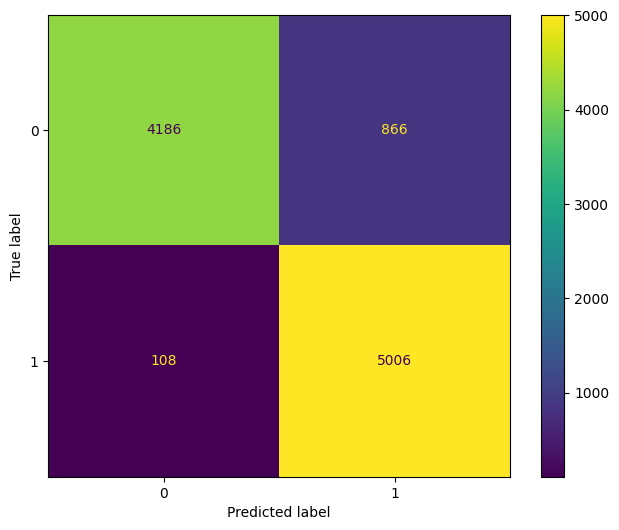

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier_train_accuracy_iteration_5 0.9332316848240415
Training accuracy of SGDClassifier() at iteration number 5 is  0.9332316848240415
Testing accuracy of SGDClassifier() at iteration number 5 is  0.9292740507574268
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      5052
           1       0.89      0.98      0.93      5114

    accuracy                           0.93     10166
   macro avg       0.93      0.93      0.93     10166
weighted avg       0.93      0.93      0.93     10166

New_highest is reached at iteration number 5  
 0.9292740507574268 [0.97584011 0.89150187] [0.87945368 0.97849042]

--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 

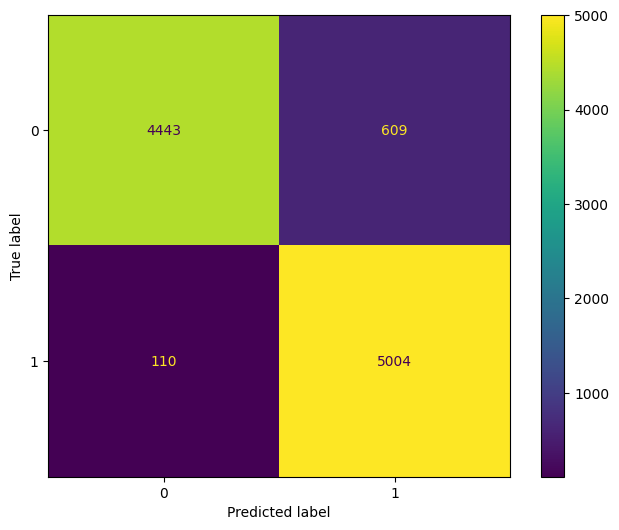

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier_train_accuracy_iteration_6 0.9449868430760151
Training accuracy of SGDClassifier() at iteration number 6 is  0.9449868430760151
Testing accuracy of SGDClassifier() at iteration number 6 is  0.9429470784969506
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      5052
           1       0.93      0.96      0.94      5114

    accuracy                           0.94     10166
   macro avg       0.94      0.94      0.94     10166
weighted avg       0.94      0.94      0.94     10166

New_highest is reached at iteration number 6  
 0.9429470784969506 [0.95744681 0.92951876] [0.9263658  0.95932734]

--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 

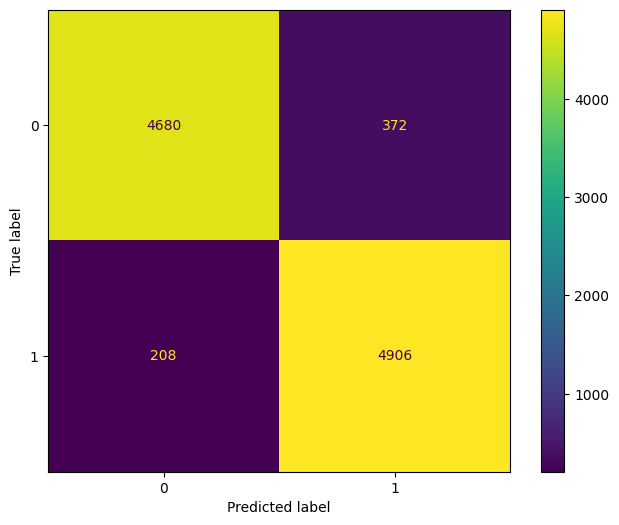

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier_train_accuracy_iteration_7 0.9490937707498217
Training accuracy of SGDClassifier() at iteration number 7 is  0.9490937707498217
Testing accuracy of SGDClassifier() at iteration number 7 is  0.9474719653747786
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5052
           1       0.95      0.95      0.95      5114

    accuracy                           0.95     10166
   macro avg       0.95      0.95      0.95     10166
weighted avg       0.95      0.95      0.95     10166

New_highest is reached at iteration number 7  
 0.9474719653747786 [0.94946279 0.94552529] [0.94457641 0.95033242]

--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 

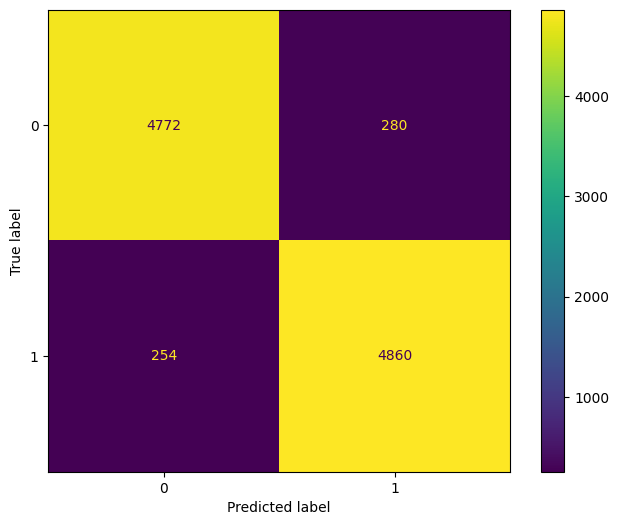

SGDClassifier_train_accuracy_iteration_8 0.9096967759388142
Training accuracy of SGDClassifier() at iteration number 8 is  0.9096967759388142
Testing accuracy of SGDClassifier() at iteration number 8 is  0.9072398190045249
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      5052
           1       0.95      0.86      0.90      5114

    accuracy                           0.91     10166
   macro avg       0.91      0.91      0.91     10166
weighted avg       0.91      0.91      0.91     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.9881564606676003, 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


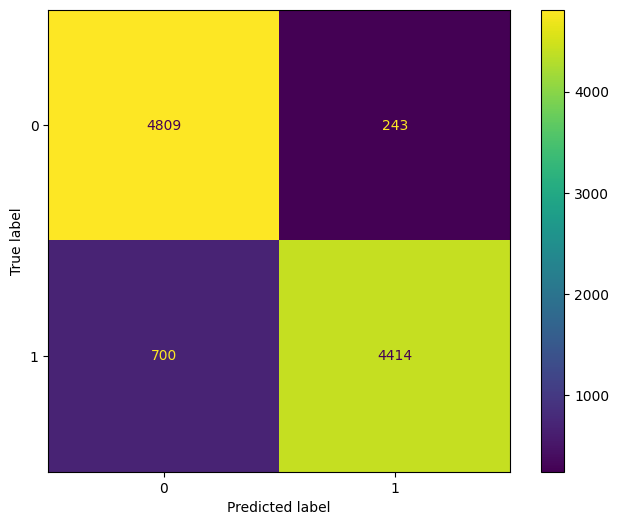

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier_train_accuracy_iteration_9 0.9508890145832821
Training accuracy of SGDClassifier() at iteration number 9 is  0.9508890145832821
Testing accuracy of SGDClassifier() at iteration number 9 is  0.9497344088136928
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5052
           1       0.94      0.96      0.95      5114

    accuracy                           0.95     10166
   macro avg       0.95      0.95      0.95     10166
weighted avg       0.95      0.95      0.95     10166

New_highest is reached at iteration number 9  
 0.9497344088136928 [0.96120252 0.93896624] [0.93665875 0.96265154]

--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 

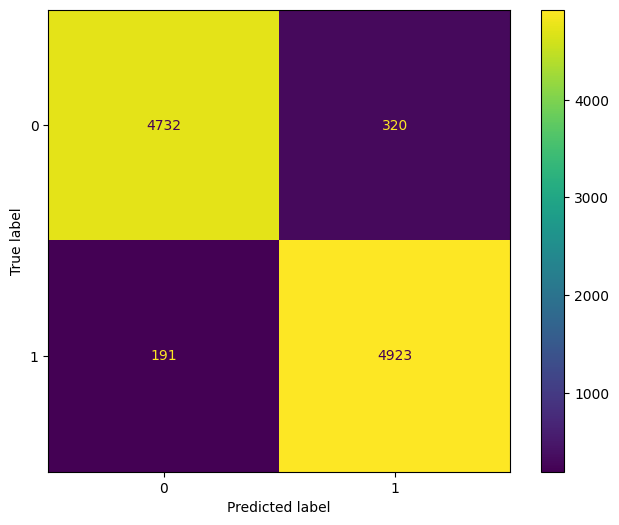

SGDClassifier_train_accuracy_iteration_10 0.9471017878661191
Training accuracy of SGDClassifier() at iteration number 10 is  0.9471017878661191
Testing accuracy of SGDClassifier() at iteration number 10 is  0.9454062561479442
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      5052
           1       0.93      0.97      0.95      5114

    accuracy                           0.95     10166
   macro avg       0.95      0.95      0.95     10166
weighted avg       0.95      0.95      0.95     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.98815646066760

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


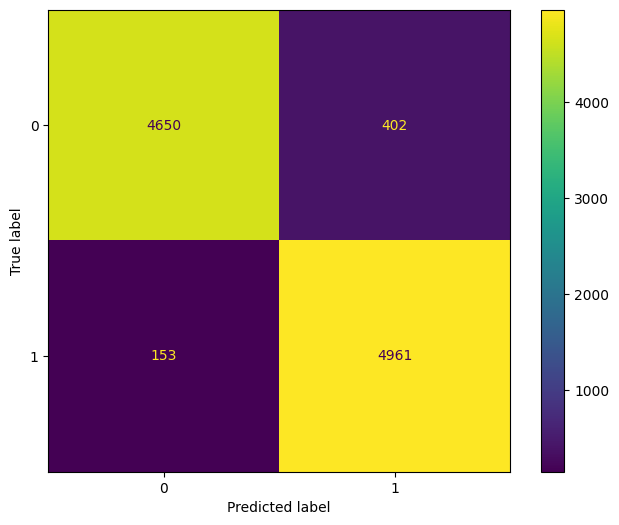

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RidgeClassifierCV_train_accuracy_iteration_1 0.757224012001082
Training accuracy of RidgeClassifierCV() at iteration number 1 is  0.757224012001082
Testing accuracy of RidgeClassifierCV() at iteration number 1 is  0.7538855006885697
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5052
           1       0.75      0.77      0.76      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166

New_highest is reached at iteration number 1  
 0.7538855006885697 [0.75841103 0.74961774] [0.74069675 0.76691435]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.93202832

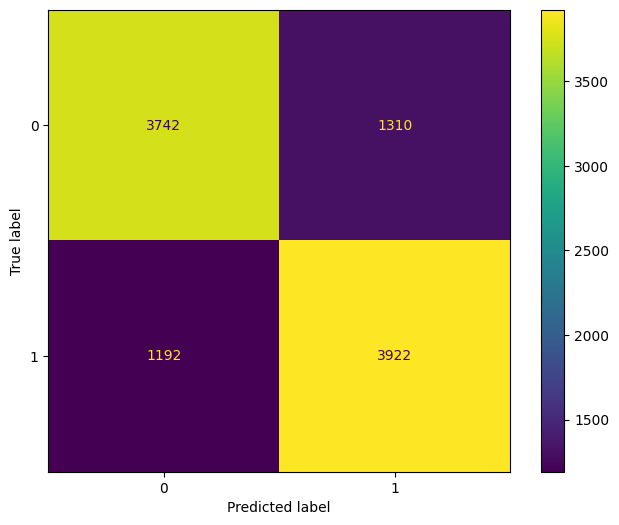

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RidgeClassifierCV_train_accuracy_iteration_2 0.757224012001082
Training accuracy of RidgeClassifierCV() at iteration number 2 is  0.757224012001082
Testing accuracy of RidgeClassifierCV() at iteration number 2 is  0.7538855006885697
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5052
           1       0.75      0.77      0.76      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.98815646

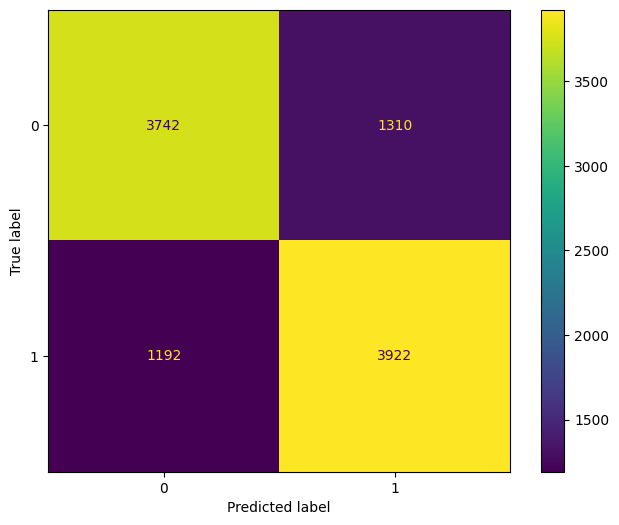

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RidgeClassifierCV_train_accuracy_iteration_3 0.757224012001082
Training accuracy of RidgeClassifierCV() at iteration number 3 is  0.757224012001082
Testing accuracy of RidgeClassifierCV() at iteration number 3 is  0.7538855006885697
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5052
           1       0.75      0.77      0.76      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.98815646

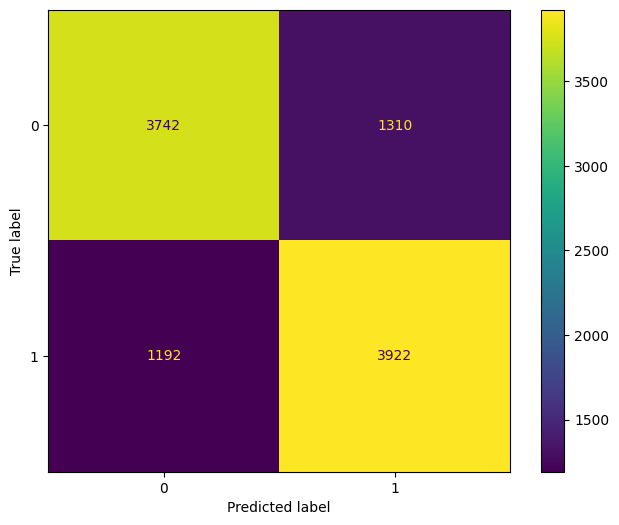

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RidgeClassifierCV_train_accuracy_iteration_4 0.757224012001082
Training accuracy of RidgeClassifierCV() at iteration number 4 is  0.757224012001082
Testing accuracy of RidgeClassifierCV() at iteration number 4 is  0.7538855006885697
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5052
           1       0.75      0.77      0.76      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.98815646

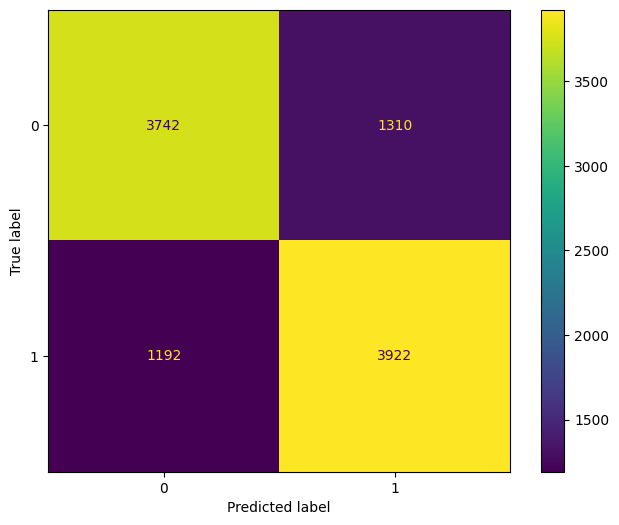

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RidgeClassifierCV_train_accuracy_iteration_5 0.757224012001082
Training accuracy of RidgeClassifierCV() at iteration number 5 is  0.757224012001082
Testing accuracy of RidgeClassifierCV() at iteration number 5 is  0.7538855006885697
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5052
           1       0.75      0.77      0.76      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.98815646

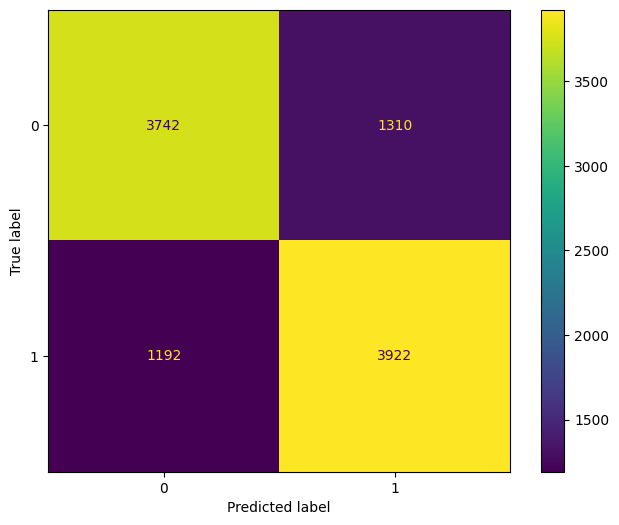

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RidgeClassifierCV_train_accuracy_iteration_6 0.757224012001082
Training accuracy of RidgeClassifierCV() at iteration number 6 is  0.757224012001082
Testing accuracy of RidgeClassifierCV() at iteration number 6 is  0.7538855006885697
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5052
           1       0.75      0.77      0.76      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.98815646

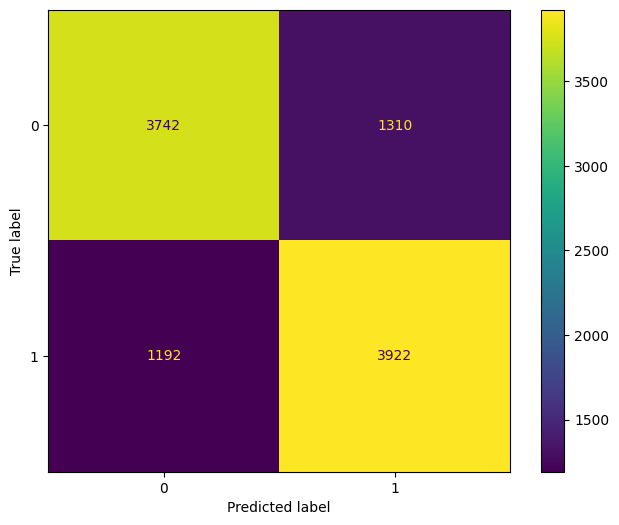

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RidgeClassifierCV_train_accuracy_iteration_7 0.757224012001082
Training accuracy of RidgeClassifierCV() at iteration number 7 is  0.757224012001082
Testing accuracy of RidgeClassifierCV() at iteration number 7 is  0.7538855006885697
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5052
           1       0.75      0.77      0.76      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.98815646

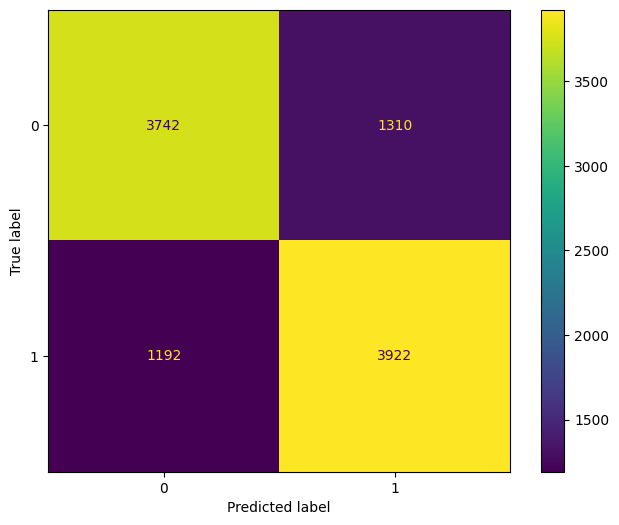

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RidgeClassifierCV_train_accuracy_iteration_8 0.757224012001082
Training accuracy of RidgeClassifierCV() at iteration number 8 is  0.757224012001082
Testing accuracy of RidgeClassifierCV() at iteration number 8 is  0.7538855006885697
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5052
           1       0.75      0.77      0.76      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.98815646

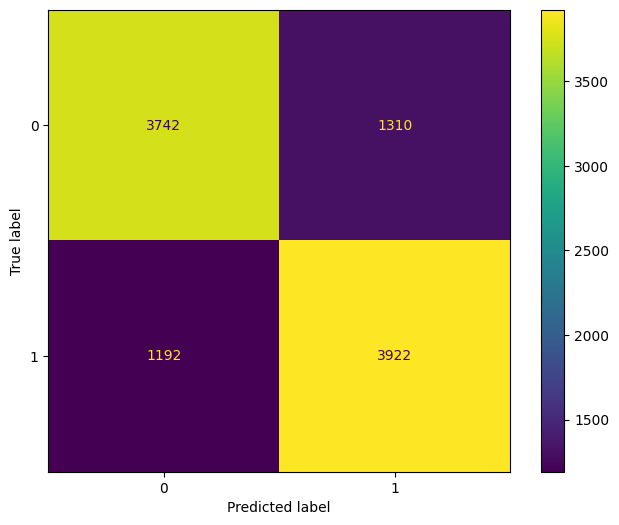

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RidgeClassifierCV_train_accuracy_iteration_9 0.757224012001082
Training accuracy of RidgeClassifierCV() at iteration number 9 is  0.757224012001082
Testing accuracy of RidgeClassifierCV() at iteration number 9 is  0.7538855006885697
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5052
           1       0.75      0.77      0.76      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.98815646

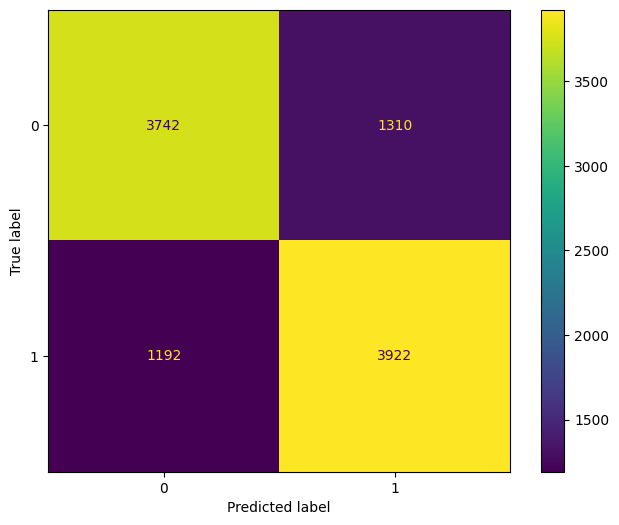

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RidgeClassifierCV_train_accuracy_iteration_10 0.757224012001082
Training accuracy of RidgeClassifierCV() at iteration number 10 is  0.757224012001082
Testing accuracy of RidgeClassifierCV() at iteration number 10 is  0.7538855006885697
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5052
           1       0.75      0.77      0.76      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.9881

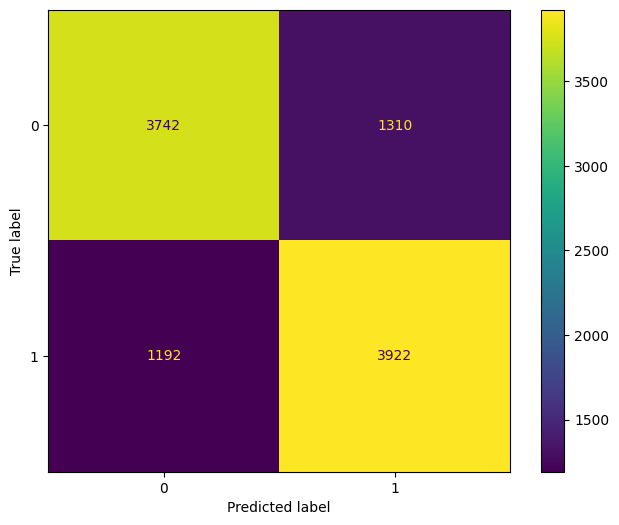

GaussianNB_train_accuracy_iteration_1 0.7093180532670978
Training accuracy of GaussianNB() at iteration number 1 is  0.7093180532670978
Testing accuracy of GaussianNB() at iteration number 1 is  0.7095219358646468
              precision    recall  f1-score   support

           0       0.97      0.43      0.60      5052
           1       0.64      0.98      0.77      5114

    accuracy                           0.71     10166
   macro avg       0.80      0.71      0.68     10166
weighted avg       0.80      0.71      0.69     10166

New_highest is reached at iteration number 1  
 0.7095219358646468 [0.9654102  0.63658197] [0.43091845 0.98474775]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


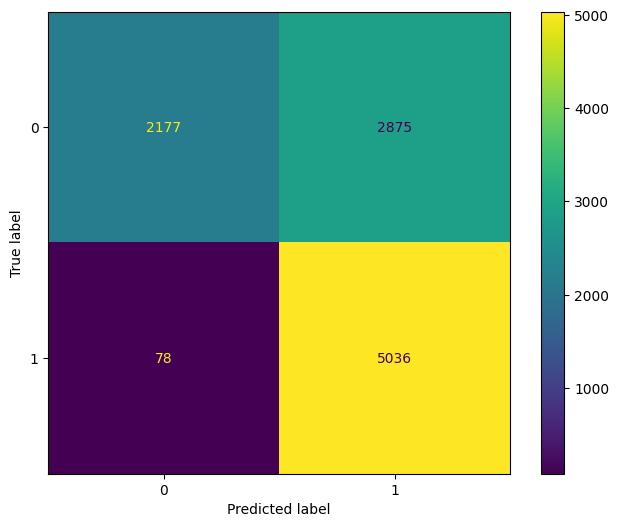

GaussianNB_train_accuracy_iteration_2 0.7093180532670978
Training accuracy of GaussianNB() at iteration number 2 is  0.7093180532670978
Testing accuracy of GaussianNB() at iteration number 2 is  0.7095219358646468
              precision    recall  f1-score   support

           0       0.97      0.43      0.60      5052
           1       0.64      0.98      0.77      5114

    accuracy                           0.71     10166
   macro avg       0.80      0.71      0.68     10166
weighted avg       0.80      0.71      0.69     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.9881564606676003, 1.9868502

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


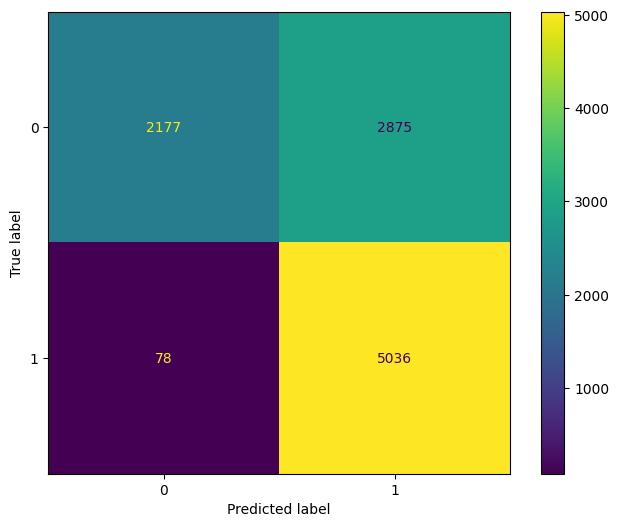

GaussianNB_train_accuracy_iteration_3 0.7093180532670978
Training accuracy of GaussianNB() at iteration number 3 is  0.7093180532670978
Testing accuracy of GaussianNB() at iteration number 3 is  0.7095219358646468
              precision    recall  f1-score   support

           0       0.97      0.43      0.60      5052
           1       0.64      0.98      0.77      5114

    accuracy                           0.71     10166
   macro avg       0.80      0.71      0.68     10166
weighted avg       0.80      0.71      0.69     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.9881564606676003, 1.9868502

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


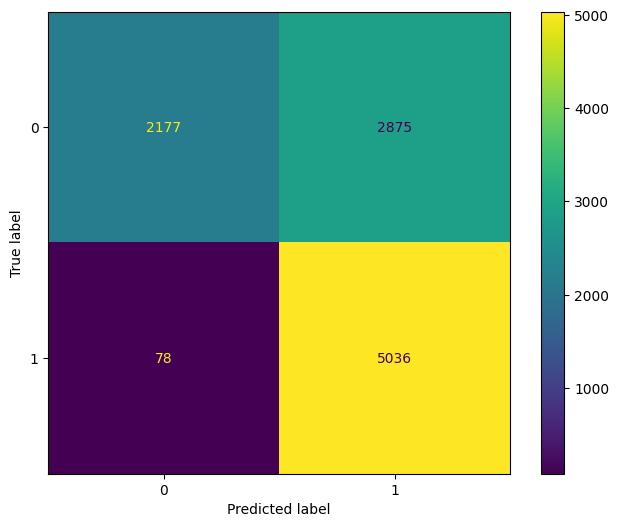

GaussianNB_train_accuracy_iteration_4 0.7093180532670978
Training accuracy of GaussianNB() at iteration number 4 is  0.7093180532670978
Testing accuracy of GaussianNB() at iteration number 4 is  0.7095219358646468
              precision    recall  f1-score   support

           0       0.97      0.43      0.60      5052
           1       0.64      0.98      0.77      5114

    accuracy                           0.71     10166
   macro avg       0.80      0.71      0.68     10166
weighted avg       0.80      0.71      0.69     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.9881564606676003, 1.9868502

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


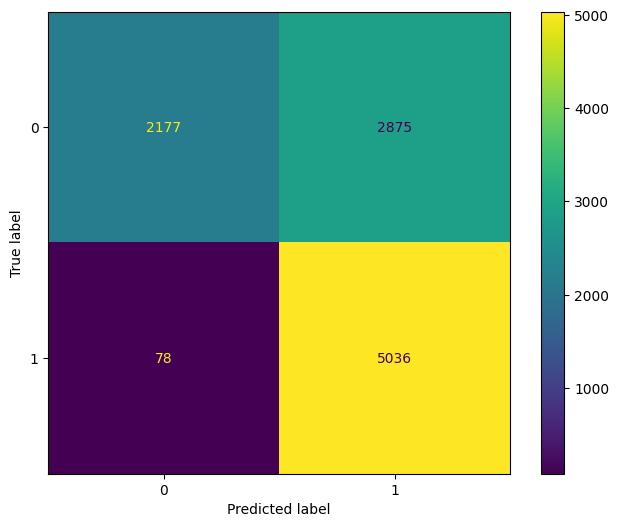

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB_train_accuracy_iteration_5 0.7093180532670978
Training accuracy of GaussianNB() at iteration number 5 is  0.7093180532670978
Testing accuracy of GaussianNB() at iteration number 5 is  0.7095219358646468
              precision    recall  f1-score   support

           0       0.97      0.43      0.60      5052
           1       0.64      0.98      0.77      5114

    accuracy                           0.71     10166
   macro avg       0.80      0.71      0.68     10166
weighted avg       0.80      0.71      0.69     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.9881564606676003, 1.9868502

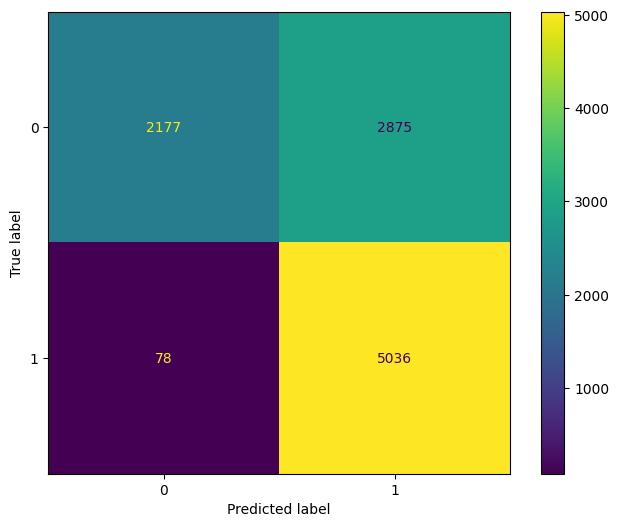

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB_train_accuracy_iteration_6 0.7093180532670978
Training accuracy of GaussianNB() at iteration number 6 is  0.7093180532670978
Testing accuracy of GaussianNB() at iteration number 6 is  0.7095219358646468
              precision    recall  f1-score   support

           0       0.97      0.43      0.60      5052
           1       0.64      0.98      0.77      5114

    accuracy                           0.71     10166
   macro avg       0.80      0.71      0.68     10166
weighted avg       0.80      0.71      0.69     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.9881564606676003, 1.9868502

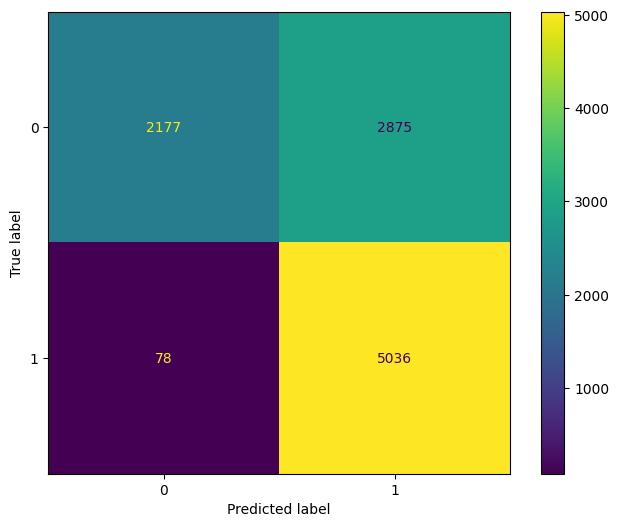

GaussianNB_train_accuracy_iteration_7 0.7093180532670978
Training accuracy of GaussianNB() at iteration number 7 is  0.7093180532670978
Testing accuracy of GaussianNB() at iteration number 7 is  0.7095219358646468
              precision    recall  f1-score   support

           0       0.97      0.43      0.60      5052
           1       0.64      0.98      0.77      5114

    accuracy                           0.71     10166
   macro avg       0.80      0.71      0.68     10166
weighted avg       0.80      0.71      0.69     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.9881564606676003, 1.9868502

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


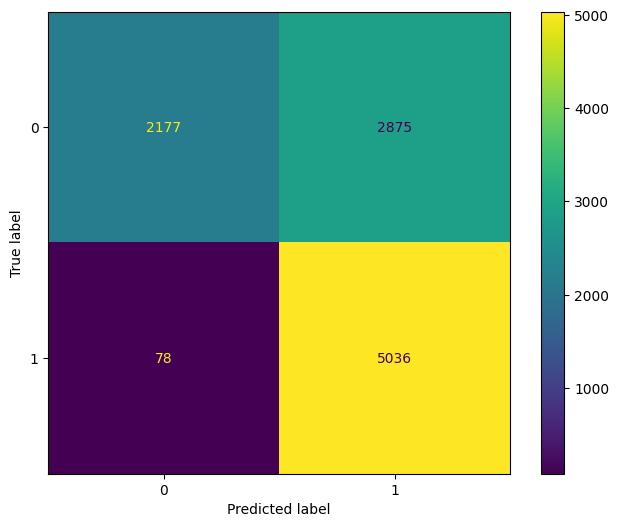

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB_train_accuracy_iteration_8 0.7093180532670978
Training accuracy of GaussianNB() at iteration number 8 is  0.7093180532670978
Testing accuracy of GaussianNB() at iteration number 8 is  0.7095219358646468
              precision    recall  f1-score   support

           0       0.97      0.43      0.60      5052
           1       0.64      0.98      0.77      5114

    accuracy                           0.71     10166
   macro avg       0.80      0.71      0.68     10166
weighted avg       0.80      0.71      0.69     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.9881564606676003, 1.9868502

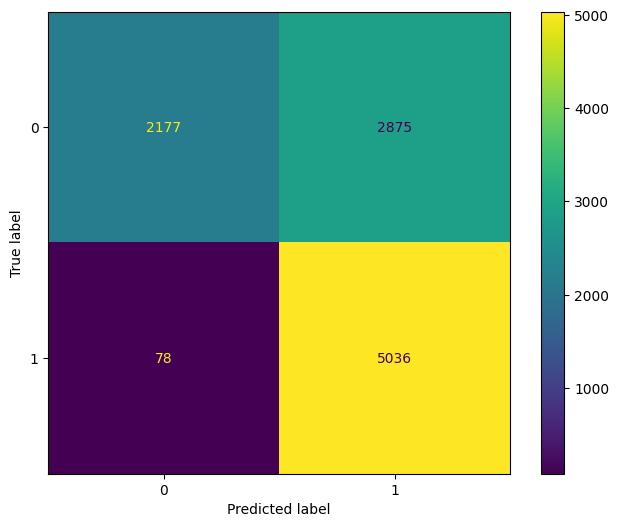

GaussianNB_train_accuracy_iteration_9 0.7093180532670978
Training accuracy of GaussianNB() at iteration number 9 is  0.7093180532670978
Testing accuracy of GaussianNB() at iteration number 9 is  0.7095219358646468
              precision    recall  f1-score   support

           0       0.97      0.43      0.60      5052
           1       0.64      0.98      0.77      5114

    accuracy                           0.71     10166
   macro avg       0.80      0.71      0.68     10166
weighted avg       0.80      0.71      0.69     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.9881564606676003, 1.9868502

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


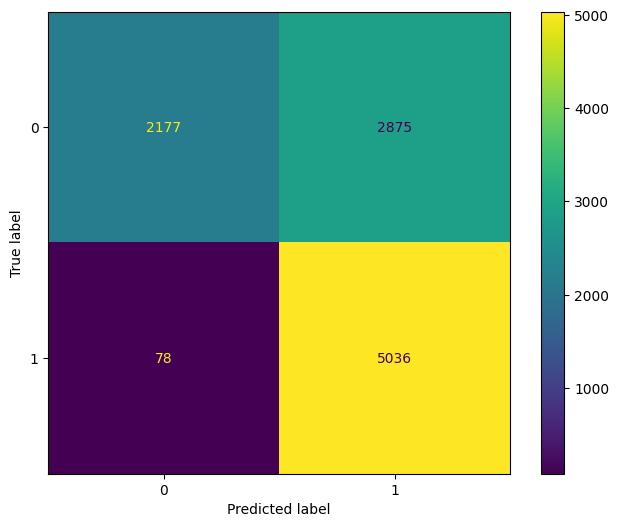

GaussianNB_train_accuracy_iteration_10 0.7093180532670978
Training accuracy of GaussianNB() at iteration number 10 is  0.7093180532670978
Testing accuracy of GaussianNB() at iteration number 10 is  0.7095219358646468
              precision    recall  f1-score   support

           0       0.97      0.43      0.60      5052
           1       0.64      0.98      0.77      5114

    accuracy                           0.71     10166
   macro avg       0.80      0.71      0.68     10166
weighted avg       0.80      0.71      0.69     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.9362581152862484, 0.9339292654488924, 1.8766152769487274, 0.0], 'DecisionTreeClassifier()': [0.9925831202046034, 0.9914942023317919, 1.9864183524095593, 0.0], 'KNeighborsClassifier()': [0.9320283297265395, 0.8884595116810117, 1.9251096287154958, 0.0], 'RandomForestClassifier()': [0.9915797757229982, 0.9881564606676003, 1.986

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


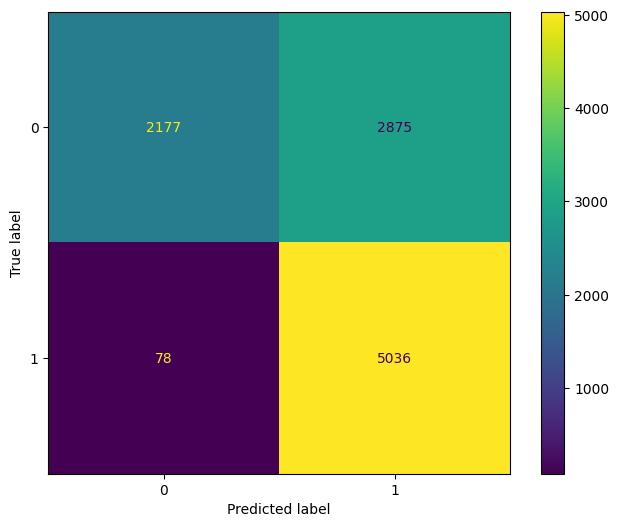

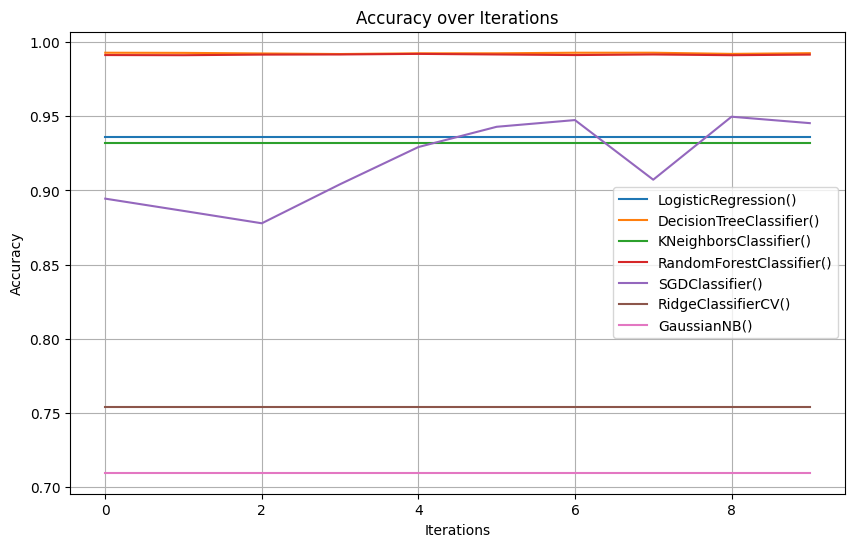

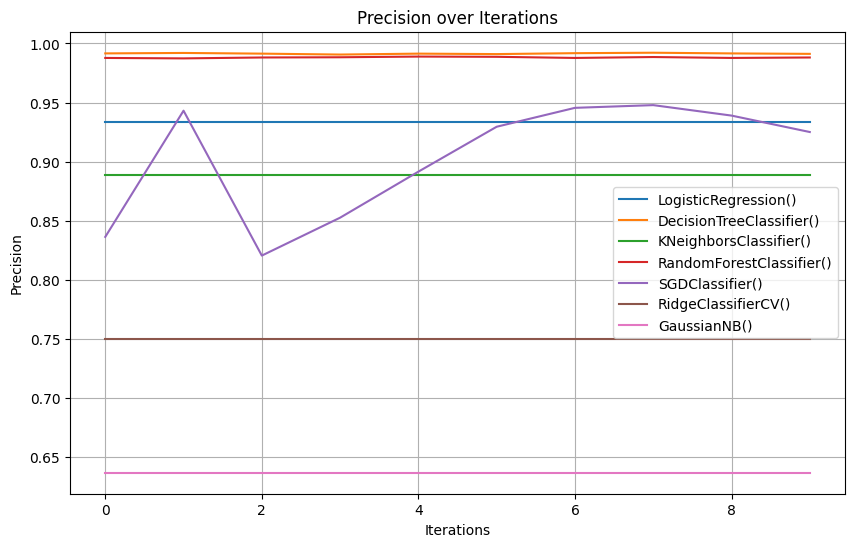

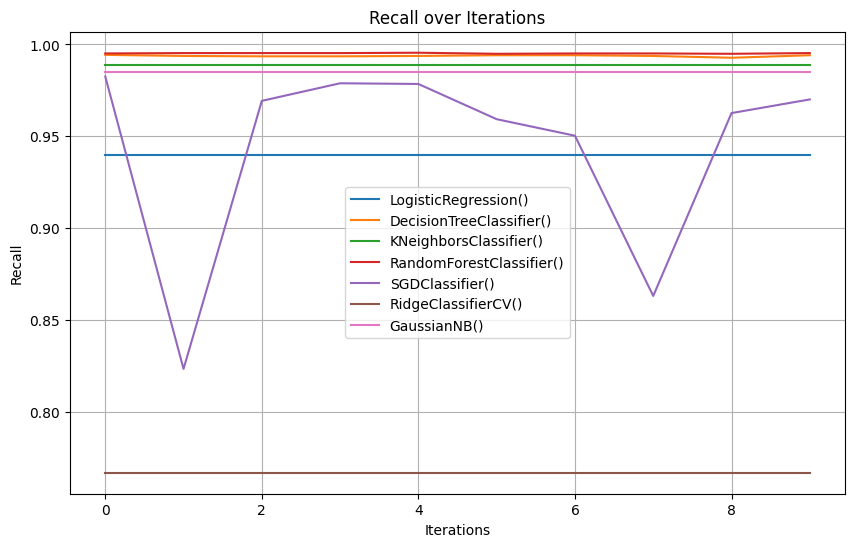

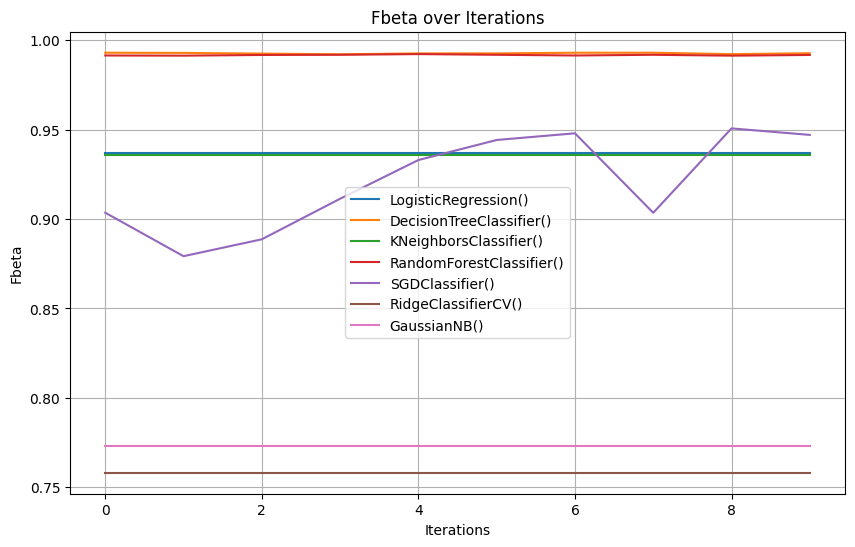

In [38]:
n_iter=10
# Perform algorithm testing and log metrics
with mlflow.start_run(run_name="logging_metrics1", experiment_id=experiment_id) as run:
    for algo in algorithms_to_be_tested:
        for i in range(n_iter):
            algo_testing(algo=algo, test_size=0.2, X=X, Y=Y, evaluation_metric="accuracy_score", random_state=42, shuffle=True, iteration_number=i+1)
            # metrics_history[algo]['accuracy'].append(avg_accuracies[algo][0])
            # metrics_history[algo]['precision'].append(avg_accuracies[algo][1])
            # metrics_history[algo]['recall'].append(avg_accuracies[algo][2])
            # metrics_history[algo]['fbeta'].append(avg_accuracies[algo][3])
        
        # Calculate average metrics
        avg_accuracies[algo][0]/=n_iter
        avg_accuracies[algo][1]/=n_iter
        avg_accuracies[algo][2]/=n_iter
        avg_accuracies[algo][3]/=n_iter


    def plot_metrics(metrics_history, metric_name):
        fig_roc=plt.figure(figsize=(10, 6))
        for algo in algorithms_to_be_tested:
            plt.plot(metrics_history[algo][metric_name], label=algo)
        plt.xlabel('Iterations')
        plt.ylabel(metric_name.capitalize())
        plt.title(f'{metric_name.capitalize()} over Iterations')
        plt.legend()
        plt.grid(True)
        plt.savefig(f"{metric_name}_plot.png")
        plt.show()
        mlflow.log_figure(fig_roc, f"metrics/{metric_name}.png")
    
        # mlflow.log_artifact(f"{metric_name}_plot.png")
    
    # Generate and log plots for each metric
    for metric in ['accuracy', 'precision', 'recall', 'fbeta']:
        plot_metrics(metrics_history, metric)
mlflow.end_run()

In [39]:
avg_accuracies

defaultdict(list,
            {'LogisticRegression()': [0.9362581152862484,
              0.9339292654488924,
              1.8766152769487274,
              0.0],
             'DecisionTreeClassifier()': [0.9925831202046034,
              0.9914942023317919,
              1.9864183524095593,
              0.0],
             'KNeighborsClassifier()': [0.9320283297265395,
              0.8884595116810117,
              1.9251096287154958,
              0.0],
             'RandomForestClassifier()': [0.9915797757229982,
              0.9881564606676003,
              1.9868502184883337,
              0.0],
             'SGDClassifier()': [0.9184733425142632,
              0.9030677469899165,
              1.8647230088121112,
              0.0],
             'RidgeClassifierCV()': [0.7538855006885699,
              0.7496177370030582,
              1.5250817604509321,
              0.0],
             'GaussianNB()': [0.7095219358646468,
              0.6365819744659335,
              1.75

In [40]:
highest_accuracies

defaultdict(list,
            {'LogisticRegression()': [0.9362581152862482,
              0.9339292654488923,
              0.936842105263158,
              -inf],
             'DecisionTreeClassifier()': [0.9929175683651387,
              0.9916146645865834,
              0.992970123022847,
              -inf],
             'KNeighborsClassifier()': [0.9320283297265395,
              0.8884595116810118,
              0.9360599611363005,
              -inf],
             'RandomForestClassifier()': [0.9921306315168208,
              0.9889277389277389,
              0.9922042486844669,
              -inf],
             'SGDClassifier()': [0.9497344088136928,
              0.9389662407018883,
              0.9506613884329439,
              -inf],
             'RidgeClassifierCV()': [0.7538855006885697,
              0.7496177370030581,
              0.7581674076937946,
              -inf],
             'GaussianNB()': [0.7095219358646468,
              0.6365819744659336,
              

In [41]:
metrics_history

defaultdict(<function __main__.<lambda>()>,
            {'LogisticRegression()': defaultdict(list,
                         {'accuracy': [0.9362581152862482,
                           0.9362581152862482,
                           0.9362581152862482,
                           0.9362581152862482,
                           0.9362581152862482,
                           0.9362581152862482,
                           0.9362581152862482,
                           0.9362581152862482,
                           0.9362581152862482,
                           0.9362581152862482],
                          'precision': [0.9339292654488923,
                           0.9339292654488923,
                           0.9339292654488923,
                           0.9339292654488923,
                           0.9339292654488923,
                           0.9339292654488923,
                           0.9339292654488923,
                           0.9339292654488923,
                           0.